In [35]:
# Install boto3
!pip install boto3

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import boto3
from botocore import UNSIGNED
from botocore.config import Config

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Datasets <br>
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db  (SpotifyTracksDB.csv)<br>
Object Url on S3 (public): https://aai-540-final-project-data.s3.us-east-1.amazonaws.com/SpotifyAudioFeaturesApril2019.csv
<br>
S3 Uri: s3://aai-540-final-project-data/SpotifyAudioFeaturesApril2019.csv
<br><br>

https://www.kaggle.com/datasets/tomigelo/spotify-audio-features (SpotifyAudioFeaturesApril2019.csv) <br>
Object Url on S3 (public): https://aai-540-final-project-data.s3.us-east-1.amazonaws.com/SpotifyTracksDB.csv <br>
S3 Uri: s3://aai-540-final-project-data/SpotifyTracksDB.csv
<br><br>



In [37]:
bucket_name = "aai-540-final-project-data"
file1_key   = "SpotifyAudioFeaturesApril2019.csv"
file2_key   = "SpotifyTracksDB.csv"

In [38]:
# Anonymous/public S3 client
s3 = boto3.client("s3", config=Config(signature_version=UNSIGNED))

In [39]:
# Load first CSV - SpotifyTracksDB
obj1 = s3.get_object(Bucket=bucket_name, Key=file1_key)
df_audio = pd.read_csv(obj1["Body"])
print("df_audio shape:", df_audio.shape)

df_audio shape: (130663, 17)


In [40]:
# Load second CSV - SpotifyAudioFeaturesApril2019.csv
obj2 = s3.get_object(Bucket=bucket_name, Key=file2_key)
df_tracks = pd.read_csv(obj2["Body"])
print("df_tracks shape:", df_tracks.shape)

df_tracks shape: (232725, 18)


In [41]:
# Peek first CSV
display(df_audio.head())

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [42]:
# Peek second CSV
display(df_tracks.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [43]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [44]:
# BASIC DATA OVERVIEW

def basic_data_overview(df_audio, df_tracks):
    """Analyze basic dataset properties and structure"""
    print("\nDATASET OVERVIEW")
    print("-" * 40)

    print(f"Audio Features Dataset: {df_audio.shape[0]:,} tracks × {df_audio.shape[1]} features")
    print(f"Tracks DB Dataset: {df_tracks.shape[0]:,} tracks × {df_tracks.shape[1]} features")

    # Check for common track_ids
    common_tracks = set(df_audio['track_id']).intersection(set(df_tracks['track_id']))
    print(f"Common tracks between datasets: {len(common_tracks):,}")

    # Memory usage
    print(f"\nMemory Usage:")
    print(f"Audio Features: {df_audio.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Tracks DB: {df_tracks.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return common_tracks

In [45]:
# DATA QUALITY ASSESSMENT

def data_quality_assessment(df_audio, df_tracks):
    """Assess data quality issues including missing values and duplicates"""
    print("\nDATA QUALITY ASSESSMENT")
    print("-" * 40)

    # Missing values
    print("Missing Values Analysis:")
    print("\nAudio Features Dataset:")
    missing_audio = df_audio.isnull().sum()
    missing_audio = missing_audio[missing_audio > 0]
    if len(missing_audio) > 0:
        print(missing_audio)
    else:
        print("No missing values found!")

    print("\nTracks Dataset:")
    missing_tracks = df_tracks.isnull().sum()
    missing_tracks = missing_tracks[missing_tracks > 0]
    if len(missing_tracks) > 0:
        print(missing_tracks)
    else:
        print("No missing values found!")

    # Duplicates
    print(f"\nDuplicate Analysis:")
    print(f"Audio Features - Duplicate track_ids: {df_audio['track_id'].duplicated().sum():,}")
    print(f"Tracks DB - Duplicate track_ids: {df_tracks['track_id'].duplicated().sum():,}")

    # Data types
    print(f"\nData Types Summary:")
    print("Audio Features:")
    print(df_audio.dtypes.value_counts())
    print("\nTracks DB:")
    print(df_tracks.dtypes.value_counts())

In [46]:
# FEATURE DISTRIBUTION ANALYSIS

def analyze_feature_distributions(df_audio, df_tracks):
    """Analyze distributions of key features for mood and novelty detection"""
    print("\nFEATURE DISTRIBUTION ANALYSIS")
    print("-" * 40)

    # Define key feature groups based on project scope
    mood_features = ['valence', 'energy', 'acousticness', 'tempo']
    novelty_features = ['popularity', 'danceability', 'instrumentalness']

    # Combine datasets for analysis (use audio features as primary)
    df = df_audio.copy()

    # Plot mood-related features
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Mood-Related Feature Distributions', fontsize=16)

    for i, feature in enumerate(mood_features):
        row, col = i // 2, i % 2
        if feature in df.columns:
            axes[row, col].hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
            axes[row, col].set_title(f'{feature.title()} Distribution')
            axes[row, col].set_xlabel(feature.title())
            axes[row, col].set_ylabel('Frequency')

            # Add statistics
            mean_val = df[feature].mean()
            axes[row, col].axvline(mean_val, color='red', linestyle='--',
                                 label=f'Mean: {mean_val:.3f}')
            axes[row, col].legend()

    plt.tight_layout()
    plt.show()

    # Plot novelty-related features
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Novelty-Related Feature Distributions', fontsize=16)

    for i, feature in enumerate(novelty_features):
        if feature in df.columns:
            axes[i].hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{feature.title()} Distribution')
            axes[i].set_xlabel(feature.title())
            axes[i].set_ylabel('Frequency')

            mean_val = df[feature].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--',
                           label=f'Mean: {mean_val:.3f}')
            axes[i].legend()

    plt.tight_layout()
    plt.show()

In [47]:
# CORRELATION ANALYSIS

def correlation_analysis(df_audio):
    """Analyze correlations between features for clustering and similarity calculations"""
    print("\nCORRELATION ANALYSIS")
    print("-" * 40)

    # Select numeric features for correlation
    numeric_features = ['valence', 'energy', 'acousticness', 'tempo',
                       'danceability', 'instrumentalness', 'popularity',
                       'loudness', 'speechiness', 'liveness', 'duration_ms']

    # Filter features that exist in the dataset
    available_features = [f for f in numeric_features if f in df_audio.columns]

    if len(available_features) > 0:
        corr_matrix = df_audio[available_features].corr()

        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

        # Highlight strong correlations
        print("Strong Correlations (|r| > 0.5):")
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:
                    strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

        for feat1, feat2, corr_val in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")



In [48]:
# GENRE ANALYSIS

def genre_analysis(df_tracks):
    """Analyze genre distribution and characteristics for content-based filtering"""
    print("\nGENRE ANALYSIS")
    print("-" * 40)

    if 'genre' in df_tracks.columns:
        # Genre distribution
        genre_counts = df_tracks['genre'].value_counts()
        print(f"Total unique genres: {len(genre_counts)}")
        print(f"\nTop 10 genres by track count:")
        print(genre_counts.head(10))

        # Plot genre distribution
        plt.figure(figsize=(12, 6))
        top_genres = genre_counts.head(15)
        plt.bar(range(len(top_genres)), top_genres.values)
        plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')
        plt.title('Top 15 Genres by Track Count')
        plt.ylabel('Number of Tracks')
        plt.tight_layout()
        plt.show()

        # Analyze genre characteristics
        numeric_cols = ['valence', 'energy', 'acousticness', 'danceability', 'popularity']
        available_cols = [col for col in numeric_cols if col in df_tracks.columns]

        if available_cols and len(top_genres) >= 5:
            genre_stats = df_tracks[df_tracks['genre'].isin(top_genres.head(5).index)].groupby('genre')[available_cols].mean()

            plt.figure(figsize=(12, 8))
            sns.heatmap(genre_stats.T, annot=True, cmap='viridis', fmt='.3f')
            plt.title('Average Feature Values by Top 5 Genres')
            plt.ylabel('Features')
            plt.xlabel('Genres')
            plt.tight_layout()
            plt.show()
    else:
        print("Genre column not found in tracks dataset")

In [49]:
# POPULARITY BIAS ANALYSIS

def popularity_bias_analysis(df_audio, df_tracks):
    """Analyze popularity distribution and potential bias toward mainstream tracks"""
    print("\nPOPULARITY BIAS ANALYSIS")
    print("-" * 40)

    # Use the dataset that has popularity
    df = df_audio if 'popularity' in df_audio.columns else df_tracks

    if 'popularity' in df.columns:
        popularity = df['popularity'].dropna()

        # Basic statistics
        print(f"Popularity Statistics:")
        print(f"  Mean: {popularity.mean():.2f}")
        print(f"  Median: {popularity.median():.2f}")
        print(f"  Std: {popularity.std():.2f}")
        print(f"  Min: {popularity.min()}")
        print(f"  Max: {popularity.max()}")

        # Distribution analysis
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram
        axes[0].hist(popularity, bins=50, alpha=0.7, edgecolor='black')
        axes[0].set_title('Popularity Distribution')
        axes[0].set_xlabel('Popularity Score')
        axes[0].set_ylabel('Frequency')
        axes[0].axvline(popularity.mean(), color='red', linestyle='--', label='Mean')
        axes[0].axvline(popularity.median(), color='green', linestyle='--', label='Median')
        axes[0].legend()

        # Box plot
        axes[1].boxplot(popularity, vert=True)
        axes[1].set_title('Popularity Box Plot')
        axes[1].set_ylabel('Popularity Score')

        plt.tight_layout()
        plt.show()

        # Bias assessment
        low_pop = (popularity < 20).sum()
        high_pop = (popularity > 60).sum()
        print(f"\nBias Assessment:")
        print(f"  Low popularity tracks (<20): {low_pop:,} ({low_pop/len(popularity)*100:.1f}%)")
        print(f"  High popularity tracks (>60): {high_pop:,} ({high_pop/len(popularity)*100:.1f}%)")


In [50]:
# OUTLIER DETECTION

def outlier_detection(df_audio):
    """Detect outliers in key features using IQR method"""
    print("\nOUTLIER DETECTION")
    print("-" * 40)

    features = ['valence', 'energy', 'acousticness', 'tempo', 'danceability', 'duration_ms']
    available_features = [f for f in features if f in df_audio.columns]

    outlier_counts = {}

    for feature in available_features:
        data = df_audio[feature].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        outlier_counts[feature] = outliers

        print(f"{feature.title()}: {outliers:,} outliers ({outliers/len(data)*100:.2f}%)")

    # Visualize outliers
    if available_features:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Outlier Detection - Box Plots', fontsize=16)

        for i, feature in enumerate(available_features[:6]):
            row, col = i // 3, i % 3
            data = df_audio[feature].dropna()
            axes[row, col].boxplot(data, vert=True)
            axes[row, col].set_title(f'{feature.title()}')
            axes[row, col].set_ylabel('Value')

        plt.tight_layout()
        plt.show()


In [51]:
# FEATURE SCALING ANALYSIS

def scaling_analysis(df_audio):
    """Analyze feature scaling requirements for clustering and similarity calculations"""
    print("\nFEATURE SCALING ANALYSIS")
    print("-" * 40)

    numeric_features = ['valence', 'energy', 'acousticness', 'tempo',
                       'danceability', 'instrumentalness', 'loudness', 'duration_ms']
    available_features = [f for f in numeric_features if f in df_audio.columns]

    print("Feature Ranges (for scaling assessment):")
    for feature in available_features:
        data = df_audio[feature].dropna()
        print(f"  {feature.title():<15}: [{data.min():.3f}, {data.max():.3f}] "
              f"(range: {data.max() - data.min():.3f})")

    # Recommend scaling approach
    print(f"\nRecommendations:")
    print(f"  - Features with different scales detected")
    print(f"  - Recommend StandardScaler or MinMaxScaler for clustering")
    print(f"  - L2 normalization recommended for cosine similarity")


In [52]:
# TRACK OVERLAP ANALYSIS Between Datasets

def analyze_track_overlap(df_audio, df_tracks):
    """
    Analyze overlap between the two datasets using track_id
    Returns detailed statistics about common and unique tracks
    """

    # Get unique track IDs from each dataset
    audio_tracks = set(df_audio['track_id'].unique())
    tracks_db_tracks = set(df_tracks['track_id'].unique())

    # Calculate overlaps
    common_tracks = audio_tracks.intersection(tracks_db_tracks)
    audio_only = audio_tracks - tracks_db_tracks
    tracks_only = tracks_db_tracks - audio_tracks

    # Print detailed statistics
    print("TRACK OVERLAP ANALYSIS")
    print("=" * 50)
    print(f"Audio Features Dataset: {len(audio_tracks):,} unique tracks")
    print(f"Tracks DB Dataset: {len(tracks_db_tracks):,} unique tracks")
    print()
    print(f"Common tracks (in both datasets): {len(common_tracks):,}")
    print(f"Only in Audio Features: {len(audio_only):,}")
    print(f"Only in Tracks DB: {len(tracks_only):,}")
    print()
    print("OVERLAP PERCENTAGES:")
    print(f"Audio Features coverage: {len(common_tracks)/len(audio_tracks)*100:.1f}%")
    print(f"Tracks DB coverage: {len(common_tracks)/len(tracks_db_tracks)*100:.1f}%")
    print()
    print(f"Total unique tracks across both datasets: {len(audio_tracks.union(tracks_db_tracks)):,}")

    return {
        'common_tracks': common_tracks,
        'audio_only': audio_only,
        'tracks_only': tracks_only,
        'audio_total': len(audio_tracks),
        'tracks_total': len(tracks_db_tracks),
        'common_count': len(common_tracks)
    }

In [53]:
# MAIN EDA PIPELINE (INSERT NEW FUNCTIONS ABOVE THEN ADD TO EXECUTABLES BELOW)

def run_complete_eda(df_audio, df_tracks):
    """Run complete EDA pipeline for music recommendation system"""
    print("Starting comprehensive EDA analysis...")

    # Execute all analysis functions
    common_tracks = basic_data_overview(df_audio, df_tracks)
    data_quality_assessment(df_audio, df_tracks)
    analyze_feature_distributions(df_audio, df_tracks)
    correlation_analysis(df_audio)
    genre_analysis(df_tracks)
    popularity_bias_analysis(df_audio, df_tracks)
    outlier_detection(df_audio)
    scaling_analysis(df_audio)
    overlap_stats = analyze_track_overlap(df_audio, df_tracks)

    return common_tracks

Starting comprehensive EDA analysis...

DATASET OVERVIEW
----------------------------------------
Audio Features Dataset: 130,663 tracks × 17 features
Tracks DB Dataset: 232,725 tracks × 18 features
Common tracks between datasets: 15,275

Memory Usage:
Audio Features: 39.21 MB
Tracks DB: 111.81 MB

DATA QUALITY ASSESSMENT
----------------------------------------
Missing Values Analysis:

Audio Features Dataset:
track_name    1
dtype: int64

Tracks Dataset:
track_name    1
dtype: int64

Duplicate Analysis:
Audio Features - Duplicate track_ids: 337
Tracks DB - Duplicate track_ids: 55,951

Data Types Summary:
Audio Features:
float64    9
int64      5
object     3
Name: count, dtype: int64

Tracks DB:
float64    9
object     7
int64      2
Name: count, dtype: int64

FEATURE DISTRIBUTION ANALYSIS
----------------------------------------


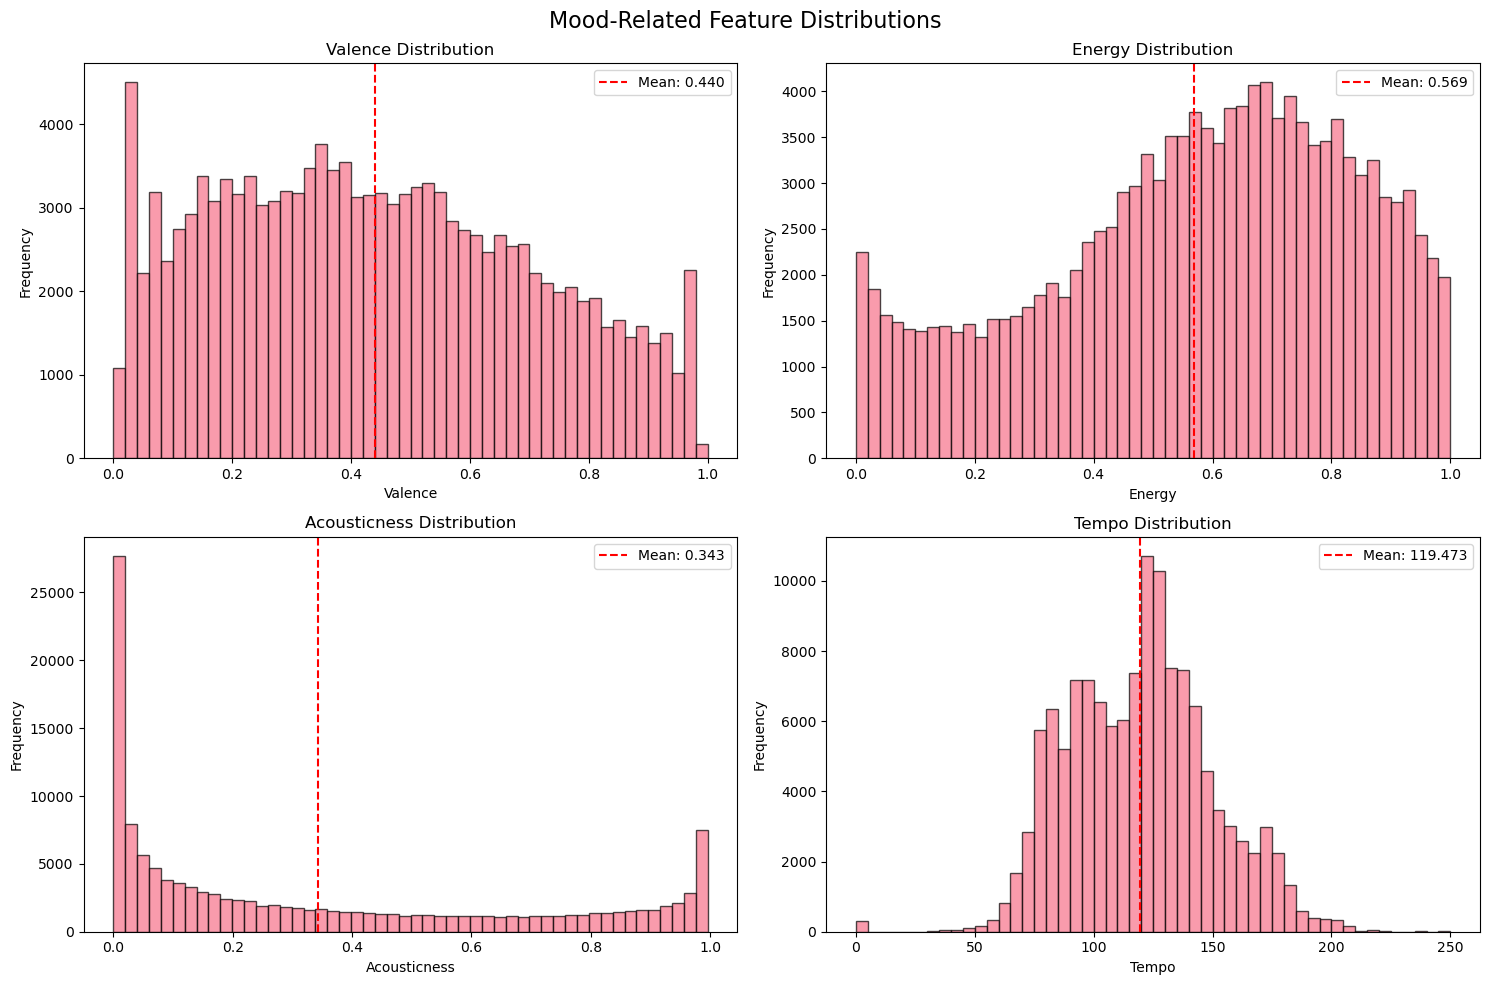

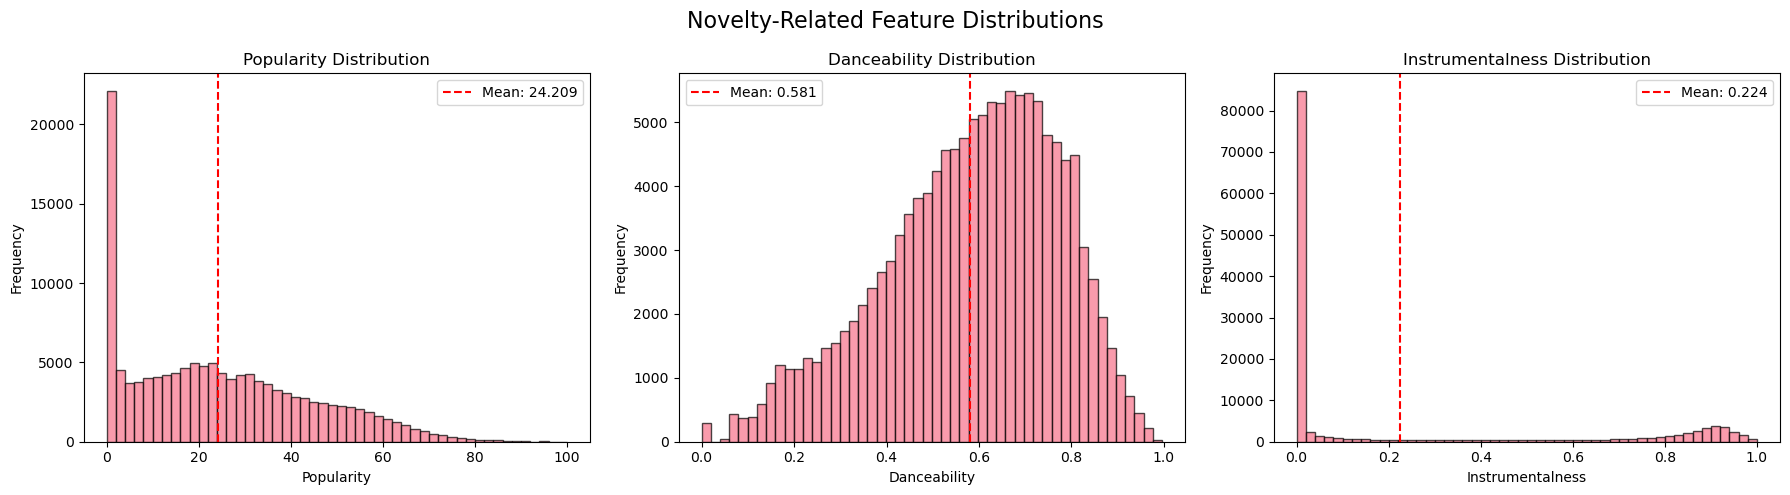


CORRELATION ANALYSIS
----------------------------------------


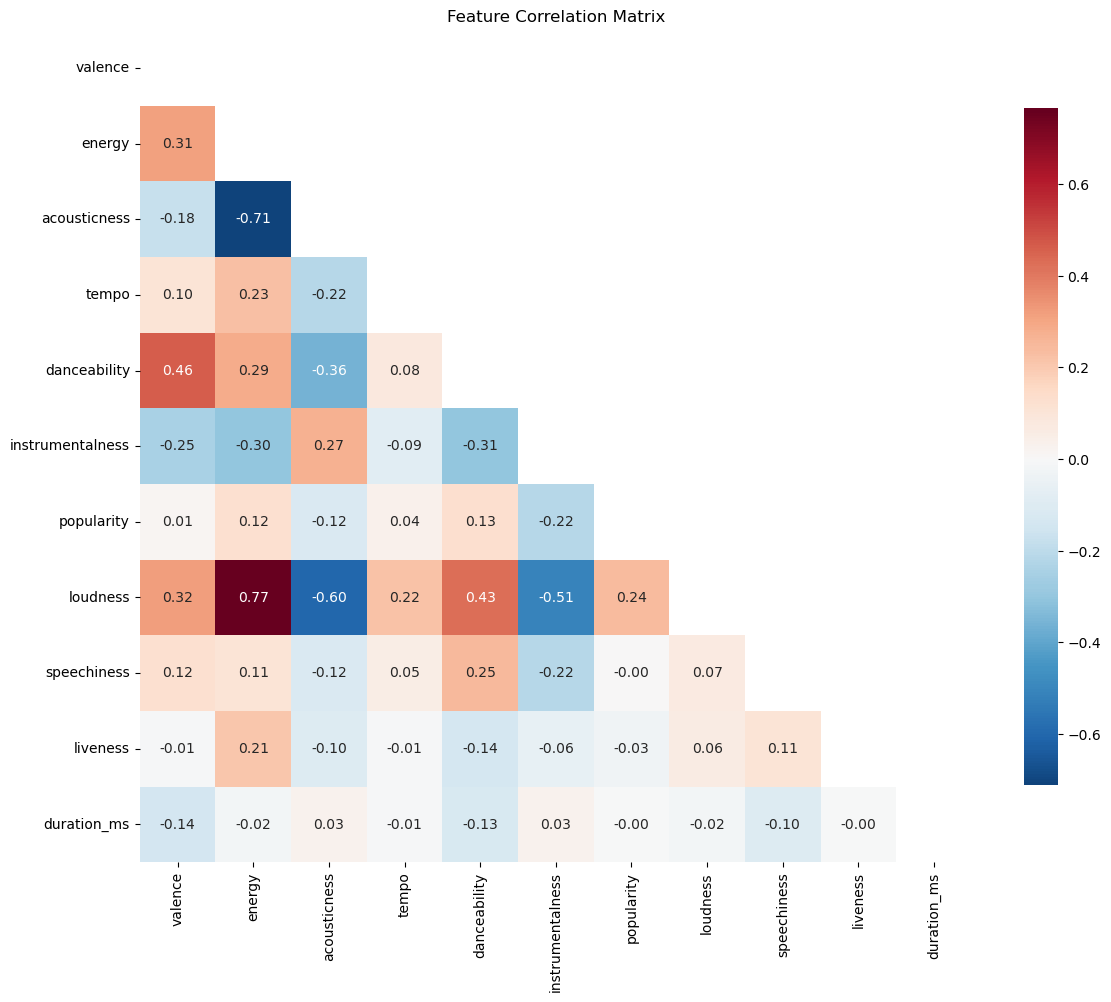

Strong Correlations (|r| > 0.5):
  energy ↔ loudness: 0.767
  energy ↔ acousticness: -0.710
  acousticness ↔ loudness: -0.603
  instrumentalness ↔ loudness: -0.509

GENRE ANALYSIS
----------------------------------------
Total unique genres: 27

Top 10 genres by track count:
genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64


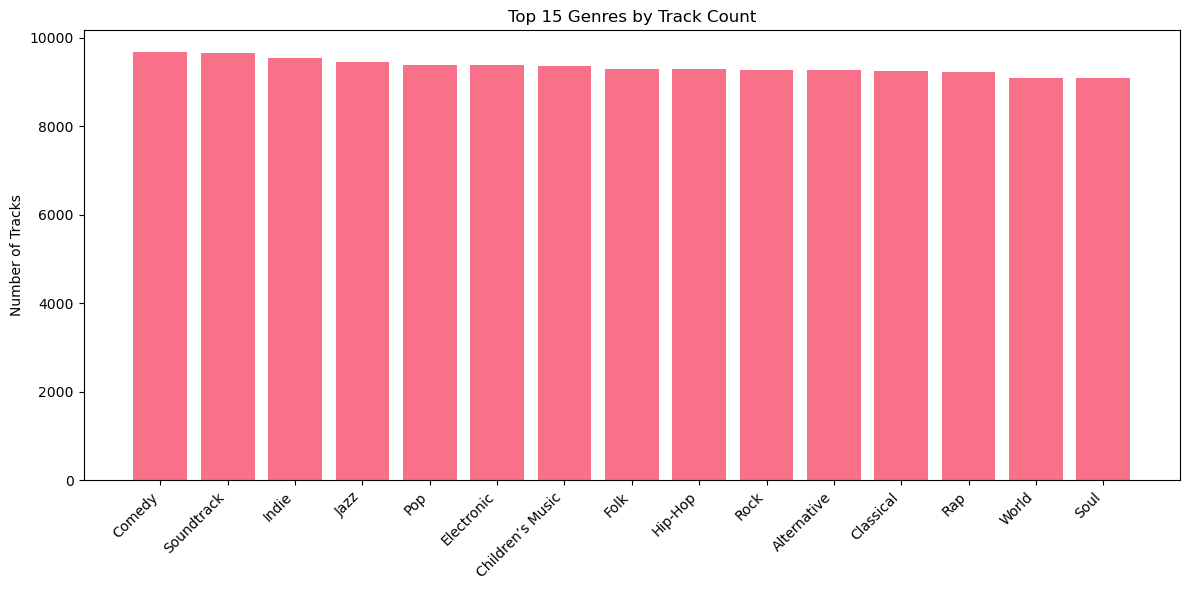

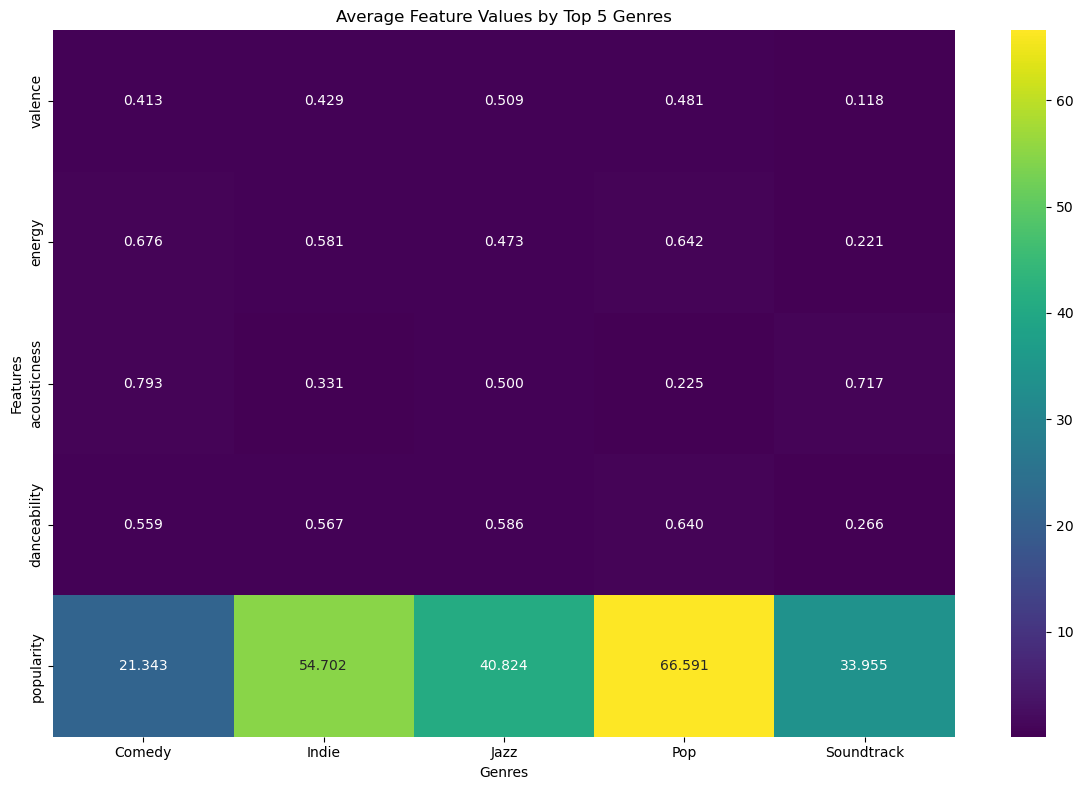


POPULARITY BIAS ANALYSIS
----------------------------------------
Popularity Statistics:
  Mean: 24.21
  Median: 22.00
  Std: 19.71
  Min: 0
  Max: 100


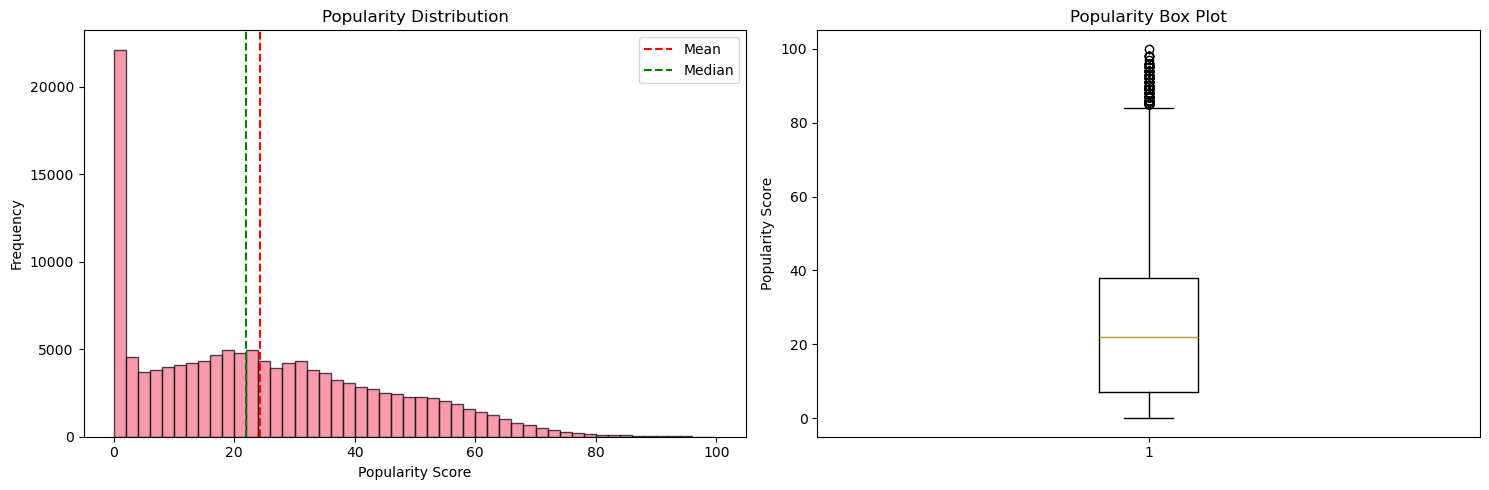


Bias Assessment:
  Low popularity tracks (<20): 60,425 (46.2%)
  High popularity tracks (>60): 6,455 (4.9%)

OUTLIER DETECTION
----------------------------------------
Valence: 0 outliers (0.00%)
Energy: 0 outliers (0.00%)
Acousticness: 0 outliers (0.00%)
Tempo: 542 outliers (0.41%)
Danceability: 307 outliers (0.23%)
Duration_Ms: 9,301 outliers (7.12%)


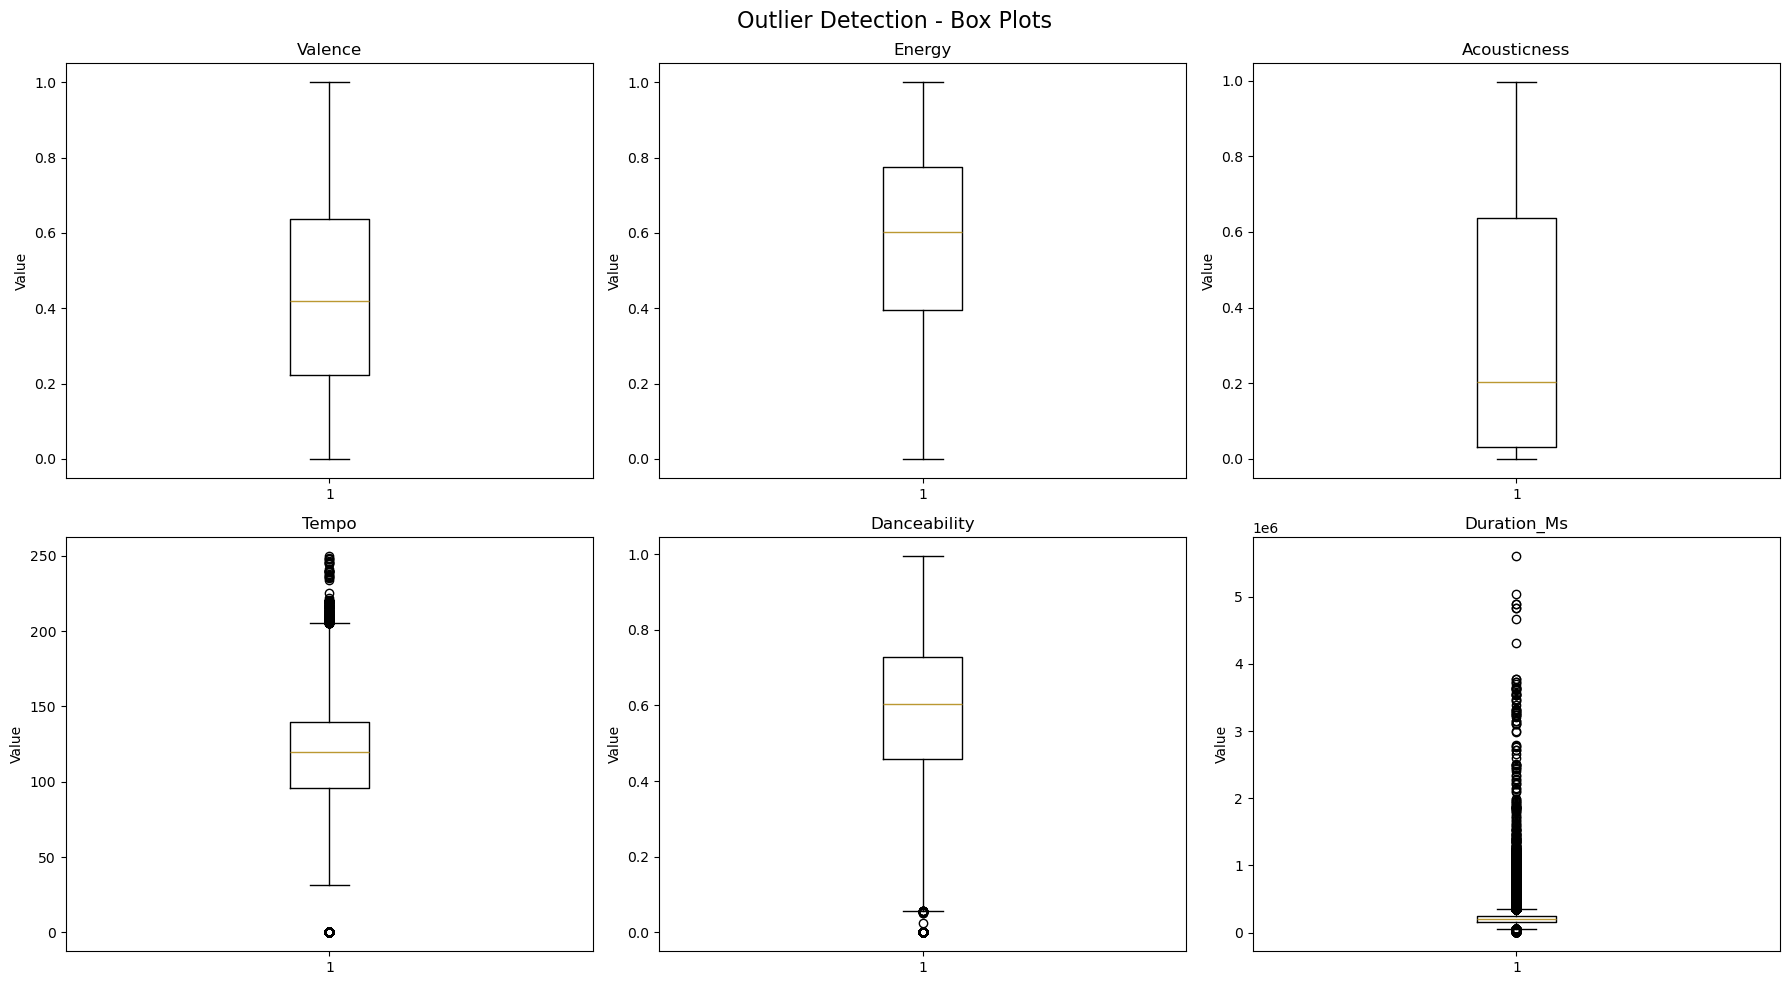


FEATURE SCALING ANALYSIS
----------------------------------------
Feature Ranges (for scaling assessment):
  Valence        : [0.000, 1.000] (range: 1.000)
  Energy         : [0.000, 1.000] (range: 1.000)
  Acousticness   : [0.000, 0.996] (range: 0.996)
  Tempo          : [0.000, 249.983] (range: 249.983)
  Danceability   : [0.000, 0.996] (range: 0.996)
  Instrumentalness: [0.000, 1.000] (range: 1.000)
  Loudness       : [-60.000, 1.806] (range: 61.806)
  Duration_Ms    : [3203.000, 5610020.000] (range: 5606817.000)

Recommendations:
  - Features with different scales detected
  - Recommend StandardScaler or MinMaxScaler for clustering
  - L2 normalization recommended for cosine similarity
TRACK OVERLAP ANALYSIS
Audio Features Dataset: 130,326 unique tracks
Tracks DB Dataset: 176,774 unique tracks

Common tracks (in both datasets): 15,275
Only in Audio Features: 115,051
Only in Tracks DB: 161,499

OVERLAP PERCENTAGES:
Audio Features coverage: 11.7%
Tracks DB coverage: 8.6%

Total uniq

In [54]:
common_tracks = run_complete_eda(df_audio, df_tracks)

## Feature Engineering

In [55]:
import pandas as pd
import numpy as np

KEY_NAMES = ['C','Cs','D','Ds','E','F','Fs','G','Gs','A','As','B']
KEY_MAP_NUM2NAME = dict(enumerate(KEY_NAMES))
TS_VALUES = [0, 1, 3, 4, 5]

def normalize_mode(s: pd.Series) -> pd.Series:
    """
    Map 'Major'->1, 'Minor'->0, keep existing 0/1; return nullable Int64.
    """
    out = s.replace({'Major': 1, 'Minor': 0})
    out = pd.to_numeric(out, errors='coerce')
    return out.astype('Int64')

def key_to_name(x):
    """
    Convert numeric pitch class (0..11) to name, or name with '#'
    to canonical 'Cs'/'Ds'/... form.
    """
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, np.integer)):
        return KEY_MAP_NUM2NAME.get(int(x), np.nan)
    s = str(x).strip()
    # Normalize sharps like 'C#' -> 'Cs'
    s = s.replace('#', 's')
    return s if s in KEY_NAMES else np.nan

def ts_to_num(x):
    """
    Convert int like 4 or string fraction like '4/4' to numerator int.
    """
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        try:
            return int(x.split('/')[0])
        except Exception:
            return np.nan
    try:
        return int(x)
    except Exception:
        return np.nan

def ohe_fixed(series: pd.Series, categories, col_namer) -> pd.DataFrame:
    """
    One-hot with a fixed set of categories and deterministic column names.
    Missing categories are included (filled with 0).
    """
    cat = pd.Categorical(series, categories=categories)
    dummies = pd.get_dummies(cat, prefix=None)
    dummies = dummies.reindex(columns=categories, fill_value=0)
    dummies.columns = [col_namer(c) for c in dummies.columns]
    return dummies.astype('uint8')

DROP_COLS_AUDIO  = ['artist_name', 'track_name', 'duration_ms']
DROP_COLS_TRACKS = ['genre', 'artist_name', 'track_name', 'duration_ms']

def prep_audio(df_audio: pd.DataFrame) -> pd.DataFrame:
    df = df_audio.drop(columns=DROP_COLS_AUDIO, errors='ignore').copy()

    # normalize mode
    df['mode'] = normalize_mode(df['mode'])

    # keys -> one-hot (0..11 mapped to names)
    key_names = df['key'].map(key_to_name)
    key_ohe = ohe_fixed(key_names, KEY_NAMES, col_namer=lambda k: f'key_{k}')

    # time_signature -> one-hot as time_signature_{N}_4
    ts_nums = df['time_signature'].map(ts_to_num)
    ts_ohe = ohe_fixed(ts_nums, TS_VALUES, col_namer=lambda n: f'time_signature_{n}_4')

    df = pd.concat(
        [df.drop(columns=['key', 'time_signature'], errors='ignore'), key_ohe, ts_ohe],
        axis=1
    )

    # ensure unique per track_id (keep first if duplicates)
    if df.index.name == 'track_id':
        df = df.reset_index()
    df = df.drop_duplicates(subset=['track_id'], keep='first')

    return df

def prep_tracks(df_tracks: pd.DataFrame) -> pd.DataFrame:
    df = df_tracks.drop(columns=DROP_COLS_TRACKS, errors='ignore').copy()

    # normalize mode
    df['mode'] = normalize_mode(df['mode'])

    # keys -> one-hot (names like 'C#' normalized to 'Cs', etc.)
    key_names = df['key'].map(key_to_name)
    key_ohe = ohe_fixed(key_names, KEY_NAMES, col_namer=lambda k: f'key_{k}')

    # time_signature strings -> numerator -> one-hot time_signature_{N}_4
    ts_nums = df['time_signature'].map(ts_to_num)
    ts_ohe = ohe_fixed(ts_nums, TS_VALUES, col_namer=lambda n: f'time_signature_{n}_4')

    df = pd.concat(
        [df.drop(columns=['key', 'time_signature'], errors='ignore'), key_ohe, ts_ohe],
        axis=1
    )

    # ensure unique per track_id (keep first if duplicates)
    if df.index.name == 'track_id':
        df = df.reset_index()
    df = df.drop_duplicates(subset=['track_id'], keep='first')

    return df

A = prep_audio(df_audio).set_index('track_id')
B = prep_tracks(df_tracks).set_index('track_id')

all_cols = sorted(set(A.columns) | set(B.columns))
A = A.reindex(columns=all_cols)
B = B.reindex(columns=all_cols)

df_merged = A.combine_first(B).reset_index()

df_merged

,track_id,acousticness,danceability,energy,instrumentalness,key_A,key_As,key_B,key_C,key_Cs,...,mode,popularity,speechiness,tempo,time_signature_0_4,time_signature_1_4,time_signature_3_4,time_signature_4_4,time_signature_5_4,valence
0,00021Wy6AyMbLP2tqij86e,0.2340,0.617,0.862,0.976000,0,0,0,0,0,...,1,13,0.0514,129.578,0,0,0,1,0,0.8860
1,0009UBVA8DCDwk1Hepib6P,0.0742,0.680,0.395,0.050500,0,1,0,0,0,...,1,0,0.0438,124.018,0,0,0,1,0,0.0938
2,000CzNKC8PEt1yC3L8dqwV,0.2490,0.518,0.805,0.000000,0,0,0,0,0,...,1,5,0.0407,79.124,0,0,0,1,0,0.8410
3,000DfZJww8KiixTKuk9usJ,0.3660,0.631,0.513,0.000004,0,0,0,0,0,...,1,30,0.0293,120.365,0,0,0,1,0,0.3070
4,000EWWBkYaREzsBplYjUag,0.8150,0.768,0.137,0.922000,0,0,0,0,1,...,0,39,0.0747,76.430,0,0,0,1,0,0.5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291820,7zzTeItz93lYI52hlcipm5,0.1130,0.716,0.806,0.000000,0,0,0,0,0,...,0,28,0.1350,136.069,0,0,0,1,0,0.5440
291821,7zzXNuz1OBFhRHiKWFod6o,0.1160,0.586,0.750,0.000000,0,0,1,0,0,...,0,35,0.0639,145.001,0,0,0,1,0,0.3340
291822,7zzZmpw8L66ZPjH1M6qmOs,0.2170,0.664,0.537,0.000003,0,0,0,0,0,...,1,67,0.0290,115.049,0,0,0,1,0,0.2210
291823,7zzbfi8fvHe6hm342GcNYl,0.0299,0.533,0.547,0.011300,1,0,0,0,0,...,1,33,0.0326,72.506,0,0,0,1,0,0.6690


In [78]:
# Further Feature Engineering for combining high impact features
# takes merged dataset and adds 
#      1) mood quadrants
#      2) mainstream/novelty scores
#      3) musical complexity

def create_additional_music_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create three high-impact features for music recommendation:
    1) Mood Quadrants (categorical + one-hot)
    2) Mainstream/Novelty scores
    3) Musical Complexity (continuous + categorical + one-hot)
    """
    df = df.copy()

    # --------------------------
    # 1) MOOD QUADRANTS
    # --------------------------
    def classify_mood_quadrant(valence, energy):
        if pd.isna(valence) or pd.isna(energy):
            return 'unknown'
        val_high = valence > 0.5
        eng_high = energy > 0.5
        if val_high and eng_high:
            return 'happy_energetic'
        elif val_high and not eng_high:
            return 'happy_calm'
        elif not val_high and eng_high:
            return 'sad_energetic'
        else:
            return 'sad_calm'

    # Create mood quadrant label
    df['mood_quadrant'] = df.apply(
        lambda row: classify_mood_quadrant(row.get('valence', np.nan), row.get('energy', np.nan)),
        axis=1
    )

    # One-hot encode mood quadrant
    mood_categories = ['happy_energetic', 'happy_calm', 'sad_energetic', 'sad_calm', 'unknown']
    for mood in mood_categories:
        df[f'mood_{mood}'] = (df['mood_quadrant'] == mood).astype('uint8')

    # --------------------------
    # 2) MAINSTREAM / NOVELTY
    # --------------------------
    # Optional: genre popularity
    if 'genre' in df.columns:
        genre_counts = df['genre'].value_counts(dropna=False)
        total_tracks = max(len(df), 1)
        genre_popularity = genre_counts / total_tracks
        df['genre_popularity'] = df['genre'].map(genre_popularity).fillna(0.0).astype(float)
    else:
        df['genre_popularity'] = 0.5  # neutral fallback

    def calculate_mainstream_score(popularity, genre_pop):
        if pd.isna(popularity):
            popularity = 0
        if pd.isna(genre_pop):
            genre_pop = 0.5
        # Normalize popularity to [0,1] if it's 0..100
        pop_norm = (popularity / 100.0) if (isinstance(popularity, (int, float)) and popularity > 1) else float(popularity or 0.0)
        # 70% track popularity, 30% genre saturation
        return (pop_norm * 0.7) + (float(genre_pop) * 0.3)

    df['mainstream_score'] = df.apply(
        lambda row: calculate_mainstream_score(row.get('popularity', 0.0), row.get('genre_popularity', 0.5)),
        axis=1
    ).astype(float)

    # Inverse = novelty (higher = more novel)
    df['novelty_score'] = (1.0 - df['mainstream_score']).clip(lower=0.0, upper=1.0).astype(float)

    # --------------------------
    # 3) MUSICAL COMPLEXITY
    # --------------------------
    def calculate_complexity(instrumentalness, speechiness, tempo, time_signature_num):
        """
        Higher score = more complex/challenging
        """
        complexity = 0.0

        # Instrumentalness
        if pd.notna(instrumentalness):
            complexity += float(instrumentalness) * 0.3

        # Speechiness above ~0.33 adds complexity
        if pd.notna(speechiness):
            speech_complexity = max(0.0, float(speechiness) - 0.33) * 1.5
            complexity += speech_complexity * 0.2

        # Tempo extremes add complexity (normalize ~0..200 BPM)
        if pd.notna(tempo):
            tempo_norm = float(tempo) / 200.0
            tempo_complexity = abs(tempo_norm - 0.6) * 2.0
            complexity += min(tempo_complexity, 0.3) * 0.3

        # Time signature: 4 is common (0), 3 or 5 moderate, others higher
        ts = int(time_signature_num) if pd.notna(time_signature_num) else 4
        if ts == 4:
            ts_complexity = 0.0
        elif ts in (3, 5):
            ts_complexity = 0.3
        else:
            ts_complexity = 0.5
        complexity += ts_complexity * 0.2

        return min(complexity, 1.0)

    # Note: earlier we one-hot-encoded time signature and dropped the raw column.
    # If missing, default to 4.
    df['musical_complexity'] = df.apply(
        lambda row: calculate_complexity(
            row.get('instrumentalness', np.nan),
            row.get('speechiness', np.nan),
            row.get('tempo', np.nan),
            row.get('time_signature', 4)  # should be 4 for most cases since raw col was dropped
        ),
        axis=1
    ).astype(float)

    # Complexity category + one-hot
    def complexity_category(x):
        if x < 0.25:
            return 'simple'
        elif x < 0.50:
            return 'moderate'
        elif x < 0.75:
            return 'complex'
        else:
            return 'very_complex'

    df['complexity_category'] = df['musical_complexity'].apply(complexity_category)
    for cat in ['simple', 'moderate', 'complex', 'very_complex']:
        df[f'complexity_{cat}'] = (df['complexity_category'] == cat).astype('uint8')

    # (Optional) quick summary in notebook stdout
    print("ADVANCED FEATURE ENGINEERING COMPLETE")
    print("=" * 45)
    if 'mood_quadrant' in df.columns:
        print("Mood quadrant distribution:")
        print(df['mood_quadrant'].value_counts())
    print("\nMainstream score statistics:")
    print(f"  Mean: {df['mainstream_score'].mean():.3f}")
    print(f"  Std:  {df['mainstream_score'].std():.3f}")
    print(f"  Min:  {df['mainstream_score'].min():.3f}")
    print(f"  Max:  {df['mainstream_score'].max():.3f}")
    if 'complexity_category' in df.columns:
        print("\nComplexity category distribution:")
        print(df['complexity_category'].value_counts())

    new_features = [
        'mood_quadrant', 'mood_happy_energetic', 'mood_happy_calm', 'mood_sad_energetic', 'mood_sad_calm',
        'mainstream_score', 'novelty_score',
        'musical_complexity', 'complexity_category',
        'complexity_simple', 'complexity_moderate', 'complexity_complex', 'complexity_very_complex',
        'genre_popularity'
    ]
    print(f"\nNew features created (present in df): {sum(c in df.columns for c in new_features)}")

    return df

In [79]:
df_enhanced = create_additional_music_features(df_merged)
df_merged = df_enhanced

print(f"\nUpdated dataset shape: {df_merged.shape}")
print("Added mood controls, mainstream/novelty, and complexity features.")

ADVANCED FEATURE ENGINEERING COMPLETE
Mood quadrant distribution:
mood_quadrant
happy_energetic    95341
sad_calm           84676
sad_energetic      83907
happy_calm         27901
Name: count, dtype: int64

Mainstream score statistics:
  Mean: 0.371
  Std:  0.143
  Min:  0.150
  Max:  0.850

Complexity category distribution:
complexity_category
simple      231112
moderate     60703
complex         10
Name: count, dtype: int64

New features created (present in df): 14

Updated dataset shape: (291825, 45)
Added mood controls, mainstream/novelty, and complexity features.


In [58]:
# View first few
df_merged.head(10)

,track_id,acousticness,danceability,energy,instrumentalness,key_A,key_As,key_B,key_C,key_Cs,...,mood_unknown,genre_popularity,mainstream_score,novelty_score,musical_complexity,complexity_category,complexity_simple,complexity_moderate,complexity_complex,complexity_very_complex
0,00021Wy6AyMbLP2tqij86e,0.234000,0.617,0.862,0.976000,0,0,0,0,0,...,0,0.5,0.241,0.759,0.321534,moderate,0,1,0,0
1,0009UBVA8DCDwk1Hepib6P,0.074200,0.680,0.395,0.050500,0,1,0,0,0,...,0,0.5,0.150,0.850,0.027204,simple,1,0,0,0
2,000CzNKC8PEt1yC3L8dqwV,0.249000,0.518,0.805,0.000000,0,0,0,0,0,...,0,0.5,0.185,0.815,0.090000,simple,1,0,0,0
3,000DfZJww8KiixTKuk9usJ,0.366000,0.631,0.513,0.000004,0,0,0,0,0,...,0,0.5,0.360,0.640,0.001096,simple,1,0,0,0
4,000EWWBkYaREzsBplYjUag,0.815000,0.768,0.137,0.922000,0,0,0,0,1,...,0,0.5,0.423,0.577,0.366600,moderate,0,1,0,0
5,000RDCYioLteXcutOjeweY,0.058300,0.679,0.770,0.000000,0,0,0,1,0,...,0,0.5,0.514,0.486,0.090000,simple,1,0,0,0
6,000TqGTOAZjAIFU6SjmFmc,0.000036,0.399,0.898,0.306000,0,0,0,0,0,...,0,0.5,0.311,0.689,0.145647,simple,1,0,0,0
7,000v2QpqP2NmikGmSkLlCZ,0.426000,0.850,0.784,0.000011,0,0,0,0,0,...,0,0.5,0.297,0.703,0.020796,simple,1,0,0,0
8,000xQL6tZNLJzIrtIgxqSl,0.131000,0.748,0.627,0.000000,0,0,0,0,0,...,0,0.5,0.640,0.360,0.002889,simple,1,0,0,0
9,0017XiMkqbTfF2AUOzlhj6,0.792000,0.536,0.780,0.000000,0,0,0,0,0,...,0,0.5,0.339,0.661,0.274500,moderate,0,1,0,0


## Initialize a feature store.

In [59]:
from sagemaker.session import Session

region = boto3.Session().region_name

boto_session = boto3.Session(region_name=region)

sagemaker_client = boto_session.client(service_name="sagemaker", region_name=region)
featurestore_runtime = boto_session.client(
    service_name="sagemaker-featurestore-runtime", region_name=region
)

feature_store_session = Session(
    boto_session=boto_session,
    sagemaker_client=sagemaker_client,
    sagemaker_featurestore_runtime_client=featurestore_runtime,
)

bucket = feature_store_session.default_bucket()

from time import gmtime, strftime, sleep

track_feature_group_name = "track_data-feature-group-" + strftime("%d-%H-%M-%S", gmtime())

from sagemaker.feature_store.feature_group import FeatureGroup

track_feature_group = FeatureGroup(
    name=track_feature_group_name, sagemaker_session=feature_store_session
)

import time

current_time_sec = int(round(time.time()))


def cast_columns(data_frame):
    for label in data_frame.columns:
        if data_frame.dtypes[label] == "object":
            data_frame[label] = data_frame[label].astype("str").astype("string")
        if data_frame.dtypes[label] == "bool":
            data_frame[label] = data_frame[label].astype("int")


# cast object dtype to string. The SageMaker FeatureStore Python SDK will then map the string dtype to String feature type.
cast_columns(df_merged)

# record identifier and event time feature names
record_identifier_feature_name = "track_id"
event_time_feature_name = "EventTime"

# append EventTime feature
df_merged[event_time_feature_name] = pd.Series(
    [current_time_sec] * len(df_merged), dtype="float64"
)

# load feature definitions to the feature group. SageMaker FeatureStore Python SDK will auto-detect the data schema based on input data.
track_feature_group.load_feature_definitions(data_frame=df_merged)
# output is suppressed

from sagemaker import get_execution_role

def wait_for_feature_group_creation_complete(feature_group):
    status = feature_group.describe().get("FeatureGroupStatus")
    while status == "Creating":
        print("Waiting for Feature Group Creation")
        time.sleep(5)
        status = feature_group.describe().get("FeatureGroupStatus")
    if status != "Created":
        raise RuntimeError(f"Failed to create feature group {feature_group.name}")
    print(f"FeatureGroup {feature_group.name} successfully created.")


prefix = 'track_dataset'
track_feature_group.create(
    s3_uri=f"s3://{bucket}/{prefix}",
    record_identifier_name=record_identifier_feature_name,
    event_time_feature_name=event_time_feature_name,
    role_arn=get_execution_role(),
    enable_online_store=True,
)

wait_for_feature_group_creation_complete(feature_group=track_feature_group)

print(track_feature_group.describe())

track_feature_group.ingest(data_frame=df_merged, max_workers=3, wait=True)

Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
FeatureGroup track_data-feature-group-28-22-43-57 successfully created.
{'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:992382479611:feature-group/track_data-feature-group-28-22-43-57', 'FeatureGroupName': 'track_data-feature-group-28-22-43-57', 'RecordIdentifierFeatureName': 'track_id', 'EventTimeFeatureName': 'EventTime', 'FeatureDefinitions': [{'FeatureName': 'track_id', 'FeatureType': 'String'}, {'FeatureName': 'acousticness', 'FeatureType': 'Fractional'}, {'FeatureName': 'danceability', 'FeatureType': 'Fractional'}, {'FeatureName': 'energy', 'FeatureType': 'Fractional'}, {'FeatureName': 'instrumentalness', 'FeatureType': 'Fractional'}, {'FeatureName': 'key_A', 'FeatureType': 'Integral'}, {'FeatureName': 'key_As', 'FeatureType': 'Integral'}

IngestionManagerPandas(feature_group_name='track_data-feature-group-28-22-43-57', feature_definitions={'track_id': {'FeatureName': 'track_id', 'FeatureType': 'String'}, 'acousticness': {'FeatureName': 'acousticness', 'FeatureType': 'Fractional'}, 'danceability': {'FeatureName': 'danceability', 'FeatureType': 'Fractional'}, 'energy': {'FeatureName': 'energy', 'FeatureType': 'Fractional'}, 'instrumentalness': {'FeatureName': 'instrumentalness', 'FeatureType': 'Fractional'}, 'key_A': {'FeatureName': 'key_A', 'FeatureType': 'Integral'}, 'key_As': {'FeatureName': 'key_As', 'FeatureType': 'Integral'}, 'key_B': {'FeatureName': 'key_B', 'FeatureType': 'Integral'}, 'key_C': {'FeatureName': 'key_C', 'FeatureType': 'Integral'}, 'key_Cs': {'FeatureName': 'key_Cs', 'FeatureType': 'Integral'}, 'key_D': {'FeatureName': 'key_D', 'FeatureType': 'Integral'}, 'key_Ds': {'FeatureName': 'key_Ds', 'FeatureType': 'Integral'}, 'key_E': {'FeatureName': 'key_E', 'FeatureType': 'Integral'}, 'key_F': {'FeatureNam

In [62]:
featurestore_runtime = boto_session.client(
    service_name="sagemaker-featurestore-runtime", region_name=region
)

record_identifier_value = '000EWWBkYaREzsBplYjUag'

featurestore_runtime.get_record(
    FeatureGroupName=track_feature_group_name,
    RecordIdentifierValueAsString=record_identifier_value,
)

{'ResponseMetadata': {'RequestId': '323a284e-fa24-4c14-b9f5-4d9f4871ea08',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '323a284e-fa24-4c14-b9f5-4d9f4871ea08',
   'content-type': 'application/json',
   'content-length': '3572',
   'date': 'Sun, 28 Sep 2025 23:05:11 GMT'},
  'RetryAttempts': 0},
 'Record': [{'FeatureName': 'track_id',
   'ValueAsString': '000EWWBkYaREzsBplYjUag'},
  {'FeatureName': 'acousticness', 'ValueAsString': '0.815'},
  {'FeatureName': 'danceability', 'ValueAsString': '0.768'},
  {'FeatureName': 'energy', 'ValueAsString': '0.137'},
  {'FeatureName': 'instrumentalness', 'ValueAsString': '0.922'},
  {'FeatureName': 'key_A', 'ValueAsString': '0'},
  {'FeatureName': 'key_As', 'ValueAsString': '0'},
  {'FeatureName': 'key_B', 'ValueAsString': '0'},
  {'FeatureName': 'key_C', 'ValueAsString': '0'},
  {'FeatureName': 'key_Cs', 'ValueAsString': '1'},
  {'FeatureName': 'key_D', 'ValueAsString': '0'},
  {'FeatureName': 'key_Ds', 'ValueAsString': '0'},
  {'

In [69]:
# Setup Athena connection to query specific Feature Store data
import boto3
import pandas as pd
import time

# Initialize Athena client
athena_client = boto_session.client('athena', region_name=region)

# Use Feature Store configuration
database_name = 'sagemaker_featurestore'
table_name = 'track_data_feature_group_28_22_43_57_1759099437'
feature_group_name = 'track_data-feature-group-28-22-43-57'

print(f"Database: {database_name}")
print(f"Table: {table_name}")
print(f"Feature Group: {feature_group_name}")

# Setup Athena query configuration
athena_output_bucket = f"s3://{bucket}/athena-results/"
athena_config = {
    'OutputLocation': athena_output_bucket,
    'EncryptionConfiguration': {
        'EncryptionOption': 'SSE_S3'
    }
}

def run_athena_query(query, database=database_name):
    """Execute Athena query and return results as DataFrame"""
    print(f"Executing query: {query[:100]}...")
    
    # Start query execution
    response = athena_client.start_query_execution(
        QueryString=query,
        QueryExecutionContext={'Database': database},
        ResultConfiguration=athena_config
    )
    
    query_execution_id = response['QueryExecutionId']
    print(f"Query execution ID: {query_execution_id}")
    
    # Wait for query to complete
    while True:
        response = athena_client.get_query_execution(QueryExecutionId=query_execution_id)
        status = response['QueryExecution']['Status']['State']
        
        if status in ['SUCCEEDED', 'FAILED', 'CANCELLED']:
            break
        time.sleep(2)
    
    if status == 'SUCCEEDED':
        # Get results
        results = athena_client.get_query_results(QueryExecutionId=query_execution_id)
        
        # Convert to DataFrame
        columns = [col['Label'] for col in results['ResultSet']['ResultSetMetadata']['ColumnInfo']]
        rows = []
        
        for row in results['ResultSet']['Rows'][1:]:  # Skip header
            row_data = [field.get('VarCharValue', '') for field in row['Data']]
            rows.append(row_data)
        
        df = pd.DataFrame(rows, columns=columns)
        
        # Convert numeric columns
        numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 
                          'valence', 'mainstream_score', 'novelty_score', 'musical_complexity',
                          'genre_popularity'] + [col for col in df.columns if col.startswith(('key_', 'time_signature_', 'mood_', 'complexity_'))]
        
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        print(f"Query completed successfully. Returned {len(df)} rows.")
        return df
    else:
        failure_reason = response['QueryExecution']['Status'].get('StateChangeReason', 'Unknown error')
        print(f"Query failed: {failure_reason}")
        return None

def run_athena_query_large(query, database=database_name):
    """Execute Athena query and paginate through all results"""
    print("Executing large query...")
    
    response = athena_client.start_query_execution(
        QueryString=query,
        QueryExecutionContext={'Database': database},
        ResultConfiguration=athena_config
    )
    
    query_execution_id = response['QueryExecutionId']
    print(f"Query execution ID: {query_execution_id}")
    
    # Wait for completion
    while True:
        response = athena_client.get_query_execution(QueryExecutionId=query_execution_id)
        status = response['QueryExecution']['Status']['State']
        if status in ['SUCCEEDED', 'FAILED', 'CANCELLED']:
            break
        print(".", end="")
        time.sleep(2)
    
    if status != 'SUCCEEDED':
        failure_reason = response['QueryExecution']['Status'].get('StateChangeReason', 'Unknown error')
        print(f"\nQuery failed: {failure_reason}")
        return None
    
    # Paginate through all results
    all_rows = []
    columns = None
    next_token = None
    page = 0
    
    while True:
        if next_token:
            results = athena_client.get_query_results(
                QueryExecutionId=query_execution_id,
                NextToken=next_token
            )
        else:
            results = athena_client.get_query_results(QueryExecutionId=query_execution_id)
        
        if columns is None:
            columns = [col['Label'] for col in results['ResultSet']['ResultSetMetadata']['ColumnInfo']]
            rows_to_process = results['ResultSet']['Rows'][1:]
        else:
            rows_to_process = results['ResultSet']['Rows']
        
        for row in rows_to_process:
            row_data = [field.get('VarCharValue', '') for field in row['Data']]
            all_rows.append(row_data)
        
        page += 1
        print(f"\nLoaded page {page}: {len(all_rows):,} rows so far...")
        
        next_token = results.get('NextToken')
        if not next_token:
            break
    
    df = pd.DataFrame(all_rows, columns=columns)
    
    # Convert numeric columns
    numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                       'liveness', 'loudness', 'popularity', 'speechiness', 'tempo',
                       'valence', 'mainstream_score', 'novelty_score', 'musical_complexity',
                       'genre_popularity'] + [col for col in df.columns if col.startswith(('key_', 'time_signature_', 'mood_', 'complexity_'))]
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    print(f"✓ Query completed. Loaded {len(df):,} total rows.")
    return df

Setting up Athena connection to your Feature Store...
Database: sagemaker_featurestore
Table: track_data_feature_group_28_22_43_57_1759099437
Feature Group: track_data-feature-group-28-22-43-57
Executing query: 
SELECT COUNT(*) as total_tracks 
FROM track_data_feature_group_28_22_43_57_1759099437 
LIMIT 10
...
Query execution ID: 69515985-4acc-4969-ae12-799c6913d89c
Query completed successfully. Returned 1 rows.
✓ Athena connection successful. Total tracks in Feature Store: 291825


In [94]:
# Cell - Load and split

print("Loading full dataset from Feature Store...")
print("=" * 60)

# Query ALL data
full_query = f"SELECT * FROM {table_name} WHERE track_id IS NOT NULL"

print("Querying Athena...")
ml_data_full = run_athena_query_large(full_query)

print(f"\nLoaded: {len(ml_data_full):,} tracks")

# Get numeric feature columns only
numeric_cols = ml_data_full.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove track_id and popularity from features (we'll add them back later)
feature_cols = [col for col in numeric_cols if col not in ['track_id', 'popularity']]

print(f"Features: {len(feature_cols)}")

# Prepare data
X = ml_data_full[feature_cols].fillna(0)
y = ml_data_full['popularity']
ids = ml_data_full['track_id']

# Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_temp, y_train, y_temp, ids_train, ids_temp = train_test_split(
    X, y, ids, test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test, ids_val, ids_test = train_test_split(
    X_temp, y_temp, ids_temp, test_size=0.5, random_state=42
)

print(f"\nTrain: {len(X_train):,}")
print(f"Val:   {len(X_val):,}")
print(f"Test:  {len(X_test):,}")

# Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=feature_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_cols)

# Add back IDs and target
X_train_scaled.insert(0, 'track_id', ids_train.values)
X_train_scaled['popularity'] = y_train.values

X_val_scaled.insert(0, 'track_id', ids_val.values)
X_val_scaled['popularity'] = y_val.values

X_test_scaled.insert(0, 'track_id', ids_test.values)
X_test_scaled['popularity'] = y_test.values

# Save to S3
import boto3
from io import BytesIO

s3 = boto3.client('s3', region_name=region)
prefix = 'music-recommender/data'

def save_csv(df, name):
    buf = BytesIO()
    df.to_csv(buf, index=False)
    buf.seek(0)
    s3.put_object(Bucket=bucket, Key=f"{prefix}/{name}.csv", Body=buf.getvalue())
    print(f"  Saved {name}.csv")

print(f"\nSaving to s3://{bucket}/{prefix}/")
save_csv(X_train_scaled, 'train')
save_csv(X_val_scaled, 'val')
save_csv(X_test_scaled, 'test')

print(f"\nDone! {len(feature_cols)} features, {len(X):,} total samples")

Loading full dataset from Feature Store...
Querying Athena...
Executing large query...
Query execution ID: 9ce88ae3-3797-46bc-a58c-866eb272dccb
..
Loaded page 1: 999 rows so far...
Loaded page 2: 1,999 rows so far...
Loaded page 3: 2,999 rows so far...
Loaded page 4: 3,999 rows so far...
Loaded page 5: 4,999 rows so far...
Loaded page 6: 5,999 rows so far...
Loaded page 7: 6,999 rows so far...
Loaded page 8: 7,999 rows so far...
Loaded page 9: 8,999 rows so far...
Loaded page 10: 9,999 rows so far...
Loaded page 11: 10,999 rows so far...
Loaded page 12: 11,999 rows so far...
Loaded page 13: 12,999 rows so far...
Loaded page 14: 13,999 rows so far...
Loaded page 15: 14,999 rows so far...
Loaded page 16: 15,999 rows so far...
Loaded page 17: 16,999 rows so far...
Loaded page 18: 17,999 rows so far...
Loaded page 19: 18,999 rows so far...
Loaded page 20: 19,999 rows so far...
Loaded page 21: 20,999 rows so far...
Loaded page 22: 21,999 rows so far...
Loaded page 23: 22,999 rows so far...


In [ ]:
# Setup SageMaker Model Registry and Model Package Group

import sagemaker
from sagemaker import get_execution_role
import json
from datetime import datetime

print("Setting up SageMaker Model Registry...")
print("=" * 60)

# SageMaker setup
sagemaker_session = sagemaker.Session()
role = get_execution_role()
sagemaker_client = boto3.client('sagemaker', region_name=region)

# Create Model Package Group (container for all the model versions)
model_package_group_name = "music-recommendation-models"
model_package_group_description = "Music track recommendation models - cosine similarity, KMeans, and other ML approaches"

try:
    response = sagemaker_client.create_model_package_group(
        ModelPackageGroupName=model_package_group_name,
        ModelPackageGroupDescription=model_package_group_description
    )
    print(f"✓ Created model package group: {model_package_group_name}")
except sagemaker_client.exceptions.ClientError as e:
    if "already exists" in str(e):
        print(f"✓ Model package group already exists: {model_package_group_name}")
    else:
        raise e

# Get the ARN
mpg_response = sagemaker_client.describe_model_package_group(
    ModelPackageGroupName=model_package_group_name
)
print(f"\nModel Package Group ARN:")
print(mpg_response['ModelPackageGroupArn'])

print(f"\n✓ Model Registry ready!")
print(f"All models will be registered under: {model_package_group_name}")


# Cell - Fix Model Registration (update the MusicRecommenderModel class)

class MusicRecommenderModel:
    """Base class for all music recommendation models"""
    
    def __init__(self, model_name, model_type, model_package_group):
        self.model_name = model_name
        self.model_type = model_type
        self.model_package_group = model_package_group
        self.model = None
        self.metrics = {}
        self.training_time = None
        
    def train(self, X_train, y_train=None):
        raise NotImplementedError
        
    def predict(self, X):
        raise NotImplementedError
        
    def evaluate(self, X_val, y_val=None):
        raise NotImplementedError
        
    def save_to_s3(self, bucket, prefix):
        """Save model artifacts to S3"""
        model_path = f"{prefix}/{self.model_type}/{self.model_name.replace(' ', '_')}"
        
        # Save model using joblib
        model_buffer = BytesIO()
        joblib.dump(self.model, model_buffer)
        model_buffer.seek(0)
        
        s3_client.put_object(
            Bucket=bucket,
            Key=f"{model_path}/model.joblib",
            Body=model_buffer.getvalue()
        )
        
        # Save metrics
        metrics_json = json.dumps(self.metrics, indent=2)
        s3_client.put_object(
            Bucket=bucket,
            Key=f"{model_path}/metrics.json",
            Body=metrics_json.encode('utf-8')
        )
        
        s3_uri = f"s3://{bucket}/{model_path}/"
        print(f"  Model saved to: {s3_uri}")
        return s3_uri
        
    def register_model(self, bucket, s3_uri):
        """Register model in SageMaker Model Registry"""
        
        model_package_description = f"{self.model_name} - {self.model_type}"
        
        # Create inference spec
        inference_spec = {
            "InferenceSpecification": {
                "Containers": [{
                    "Image": "683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-scikit-learn:1.2-1-cpu-py3",
                    "ModelDataUrl": s3_uri + "model.joblib"
                }],
                "SupportedContentTypes": ["text/csv"],
                "SupportedResponseMIMETypes": ["text/csv"]
            }
        }
        
        try:
            response = sagemaker_client.create_model_package(
                ModelPackageGroupName=self.model_package_group,
                ModelPackageDescription=model_package_description,
                **inference_spec,
                ModelApprovalStatus="PendingManualApproval",
                CustomerMetadataProperties={
                    "training_date": datetime.now().isoformat(),
                    "model_name": self.model_name,
                    "model_type": self.model_type,
                    **{k: str(v) for k, v in self.metrics.items()}
                }
            )
            
            model_package_arn = response['ModelPackageArn']
            print(f"  ✓ Registered: {model_package_arn.split('/')[-1]}")
            return model_package_arn
            
        except Exception as e:
            print(f"  Warning: Registration failed: {str(e)[:100]}")
            return None

Setting up SageMaker Model Registry...
✓ Model package group already exists: music-recommendation-models

Model Package Group ARN:
arn:aws:sagemaker:us-east-1:992382479611:model-package-group/music-recommendation-models

✓ Model Registry ready!
All models will be registered under: music-recommendation-models


In [102]:
class CosineSimilarityModel(MusicRecommenderModel):
    """Cosine similarity recommender"""
    
    def __init__(self, model_package_group):
        super().__init__("Cosine-Similarity-Recommender", "cosine_similarity", model_package_group)
        
    def train(self, X_train, track_ids_train):
        start = datetime.now()
        self.model = {
            'features': X_train.values,
            'track_ids': track_ids_train.values,
            'feature_names': X_train.columns.tolist()
        }
        self.training_time = (datetime.now() - start).total_seconds()
        
        # Calculate sample similarities for metrics
        sample_size = min(1000, len(X_train))
        sample_sim = cosine_similarity(X_train.values[:sample_size])
        
        self.metrics = {
            'n_tracks': len(track_ids_train),
            'n_features': X_train.shape[1],
            'avg_similarity': float(sample_sim.mean()),
            'std_similarity': float(sample_sim.std()),
            'training_time_seconds': self.training_time
        }
        print(f"  Trained on {len(track_ids_train):,} tracks")
        return self
        
    def predict(self, track_id, n=10):
        """Get top N similar tracks"""
        idx = np.where(self.model['track_ids'] == track_id)[0]
        if len(idx) == 0:
            return []
        
        track_vec = self.model['features'][idx[0]].reshape(1, -1)
        similarities = cosine_similarity(track_vec, self.model['features'])[0]
        top_idx = np.argsort(similarities)[::-1][1:n+1]
        
        return [(self.model['track_ids'][i], float(similarities[i])) for i in top_idx]
        
    def evaluate(self, X_val, track_ids_val):
        """Evaluate on validation set"""
        sample_size = min(100, len(X_val))
        sample_ids = track_ids_val.values[:sample_size]
        
        avg_sims = []
        for tid in sample_ids:
            recs = self.predict(tid, n=5)
            if recs:
                avg_sims.append(np.mean([sim for _, sim in recs]))
        
        self.metrics['val_avg_similarity'] = float(np.mean(avg_sims))
        print(f"  Val avg similarity: {self.metrics['val_avg_similarity']:.4f}")
        return self.metrics

In [103]:
class KMeansModel(MusicRecommenderModel):
    """KMeans clustering recommender"""
    
    def __init__(self, n_clusters, model_package_group):
        super().__init__(f"KMeans-k{n_clusters}", "clustering", model_package_group)
        self.n_clusters = n_clusters
        
    def train(self, X_train, track_ids_train):
        start = datetime.now()
        self.model = {
            'kmeans': KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10),
            'features': X_train.values,
            'track_ids': track_ids_train.values
        }
        self.model['labels'] = self.model['kmeans'].fit_predict(X_train)
        self.training_time = (datetime.now() - start).total_seconds()
        
        from sklearn.metrics import silhouette_score
        
        self.metrics = {
            'n_clusters': self.n_clusters,
            'n_tracks': len(track_ids_train),
            'inertia': float(self.model['kmeans'].inertia_),
            'silhouette_score': float(silhouette_score(X_train, self.model['labels'])),
            'training_time_seconds': self.training_time
        }
        print(f"  Silhouette: {self.metrics['silhouette_score']:.4f}")
        return self
        
    def predict(self, track_id, n=10):
        """Get tracks from same cluster"""
        idx = np.where(self.model['track_ids'] == track_id)[0]
        if len(idx) == 0:
            return []
            
        cluster = self.model['labels'][idx[0]]
        cluster_idx = np.where(self.model['labels'] == cluster)[0]
        
        track_vec = self.model['features'][idx[0]].reshape(1, -1)
        similarities = cosine_similarity(track_vec, self.model['features'][cluster_idx])[0]
        
        sorted_idx = np.argsort(similarities)[::-1][1:n+1]
        return [(self.model['track_ids'][cluster_idx[i]], float(similarities[i])) for i in sorted_idx]
        
    def evaluate(self, X_val, track_ids_val):
        from sklearn.metrics import silhouette_score
        val_labels = self.model['kmeans'].predict(X_val)
        self.metrics['val_silhouette_score'] = float(silhouette_score(X_val, val_labels))
        print(f"  Val silhouette: {self.metrics['val_silhouette_score']:.4f}")
        return self.metrics


In [104]:
# PLACE ADDITIONAL MODELS HERE IN CLASS

In [105]:
# Model Training Framework with Auto-Registration

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from datetime import datetime

class MusicRecommenderModel:
    """Base class for all music recommendation models"""
    
    def __init__(self, model_name, model_type, model_package_group):
        self.model_name = model_name
        self.model_type = model_type
        self.model_package_group = model_package_group
        self.model = None
        self.metrics = {}
        self.training_time = None
        
    def train(self, X_train, y_train=None):
        raise NotImplementedError
        
    def predict(self, X):
        raise NotImplementedError
        
    def evaluate(self, X_val, y_val=None):
        raise NotImplementedError
        
    def save_to_s3(self, bucket, prefix):
        """Save model artifacts to S3"""
        model_path = f"{prefix}/{self.model_type}/{self.model_name.replace(' ', '_')}"
        
        # Save model using joblib
        model_buffer = BytesIO()
        joblib.dump(self.model, model_buffer)
        model_buffer.seek(0)
        
        s3_client.put_object(
            Bucket=bucket,
            Key=f"{model_path}/model.joblib",
            Body=model_buffer.getvalue()
        )
        
        # Save metrics
        metrics_json = json.dumps(self.metrics, indent=2)
        s3_client.put_object(
            Bucket=bucket,
            Key=f"{model_path}/metrics.json",
            Body=metrics_json.encode('utf-8')
        )
        
        s3_uri = f"s3://{bucket}/{model_path}/"
        print(f"  Model saved to: {s3_uri}")
        return s3_uri
        
    def register_model(self, bucket, s3_uri):
        """Register model in SageMaker Model Registry"""
        
        model_package_description = f"{self.model_name} - {self.model_type}"
        
        # Create inference spec
        inference_spec = {
            "InferenceSpecification": {
                "Containers": [{
                    "Image": "683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-scikit-learn:1.2-1-cpu-py3",
                    "ModelDataUrl": s3_uri + "model.joblib"
                }],
                "SupportedContentTypes": ["text/csv"],
                "SupportedResponseMIMETypes": ["text/csv"]
            }
        }
        
        try:
            response = sagemaker_client.create_model_package(
                ModelPackageGroupName=self.model_package_group,
                ModelPackageDescription=model_package_description,
                **inference_spec,
                ModelApprovalStatus="PendingManualApproval",
                CustomerMetadataProperties={
                    "training_date": datetime.now().isoformat(),
                    "model_name": self.model_name,
                    "model_type": self.model_type,
                    **{k: str(v) for k, v in self.metrics.items()}
                }
            )
            
            model_package_arn = response['ModelPackageArn']
            print(f"  ✓ Registered: {model_package_arn.split('/')[-1]}")
            return model_package_arn
            
        except Exception as e:
            print(f"  Warning: Registration failed: {str(e)[:100]}")
            return None


In [106]:
# Train models and register in Model Registry

import boto3
from io import BytesIO

print("Training models and registering in Model Registry...")
print("=" * 60)

# Initialize S3 client
s3_client = boto3.client('s3', region_name=region)

# Load data from S3
def load_from_s3(filename):
    obj = s3_client.get_object(Bucket=bucket, Key=f"music-recommender/data/{filename}.csv")
    return pd.read_csv(BytesIO(obj['Body'].read()))

train_data = load_from_s3('train')
val_data = load_from_s3('val')

# Separate features, targets, and IDs
feature_cols = [col for col in train_data.columns if col not in ['track_id', 'popularity']]

X_train = train_data[feature_cols]
ids_train = train_data['track_id']
y_train = train_data['popularity']

X_val = val_data[feature_cols]
ids_val = val_data['track_id']
y_val = val_data['popularity']

print(f"Training data: {len(X_train):,} samples, {len(feature_cols)} features")

# Define models to train
models = [
    CosineSimilarityModel(model_package_group_name),
    KMeansModel(n_clusters=10, model_package_group=model_package_group_name),
    KMeansModel(n_clusters=20, model_package_group=model_package_group_name),
    KMeansModel(n_clusters=50, model_package_group=model_package_group_name),
    KMeansModel(n_clusters=100, model_package_group=model_package_group_name),
]

trained_models = []

for model in models:
    print(f"\n{model.model_name}")
    print("-" * 60)
    
    # Train
    model.train(X_train, ids_train)
    
    # Evaluate
    model.evaluate(X_val, ids_val)
    
    # Save to S3
    s3_uri = model.save_to_s3(bucket, "music-recommender/models")
    
    # Register in Model Registry
    model_package_arn = model.register_model(bucket, s3_uri)
    
    trained_models.append({
        'name': model.model_name,
        'type': model.model_type,
        'metrics': model.metrics,
        's3_uri': s3_uri,
        'model_package_arn': model_package_arn
    })

print(f"\n{'='*60}")
print(f"✓ Trained and registered {len(trained_models)} models")
print(f"{'='*60}")

# Summary
for m in trained_models:
    print(f"\n{m['name']}")
    print(f"  Type: {m['type']}")
    print(f"  S3: {m['s3_uri']}")
    if 'silhouette_score' in m['metrics']:
        print(f"  Silhouette: {m['metrics']['silhouette_score']:.4f}")
    if 'avg_similarity' in m['metrics']:
        print(f"  Avg Similarity: {m['metrics']['avg_similarity']:.4f}")

Training models and registering in Model Registry...
Training data: 233,460 samples, 40 features

Cosine-Similarity-Recommender
------------------------------------------------------------
  Trained on 233,460 tracks
  Val avg similarity: nan
  Model saved to: s3://sagemaker-us-east-1-992382479611/music-recommender/models/cosine_similarity/Cosine-Similarity-Recommender/
  ✓ Registered: 1

KMeans-k10
------------------------------------------------------------
  Silhouette: 0.0864
  Val silhouette: 0.0850
  Model saved to: s3://sagemaker-us-east-1-992382479611/music-recommender/models/clustering/KMeans-k10/
  ✓ Registered: 2

KMeans-k20
------------------------------------------------------------
  Silhouette: 0.1842
  Val silhouette: 0.1855
  Model saved to: s3://sagemaker-us-east-1-992382479611/music-recommender/models/clustering/KMeans-k20/
  ✓ Registered: 3

KMeans-k50
------------------------------------------------------------
  Silhouette: 0.1937
  Val silhouette: 0.1923
  Model 

In [109]:
# Cell - Test with tracks from training set

print("Testing model predictions with training tracks...")
print("=" * 60)

# Load training data to get valid track IDs
train_data = load_from_s3('train')
ids_train_sample = train_data['track_id'].iloc[:1000]  # Sample from first 1000

# Pick 3 random tracks from training set
test_track_ids = ids_train_sample.sample(3, random_state=42).tolist()

print(f"Testing with {len(test_track_ids)} tracks from training set\n")

# Load models once
loaded_models = {}
for model_info in trained_models:
    key = model_info['s3_uri'].replace(f"s3://{bucket}/", "") + "model.joblib"
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    loaded_models[model_info['name']] = {
        'data': joblib.load(BytesIO(obj['Body'].read())),
        'type': model_info['type']
    }

# Test each track
for test_track_id in test_track_ids:
    print("="*60)
    print(f"TRACK: {test_track_id}")
    print("="*60)
    
    for model_name, model_info in loaded_models.items():
        print(f"\n{model_name}")
        print("-" * 60)
        
        model_data = model_info['data']
        
        try:
            idx = np.where(model_data['track_ids'] == test_track_id)[0][0]
            
            if model_info['type'] == 'cosine_similarity':
                track_vec = model_data['features'][idx].reshape(1, -1)
                similarities = cosine_similarity(track_vec, model_data['features'])[0]
                top_idx = np.argsort(similarities)[::-1][1:6]
                
                for i, top_i in enumerate(top_idx, 1):
                    print(f"  {i}. {model_data['track_ids'][top_i]} (sim: {similarities[top_i]:.4f})")
                    
            elif model_info['type'] == 'clustering':
                cluster = model_data['labels'][idx]
                cluster_idx = np.where(model_data['labels'] == cluster)[0]
                
                track_vec = model_data['features'][idx].reshape(1, -1)
                similarities = cosine_similarity(track_vec, model_data['features'][cluster_idx])[0]
                sorted_idx = np.argsort(similarities)[::-1][1:6]
                
                print(f"Cluster {cluster} ({len(cluster_idx)} tracks)")
                for i, idx_in_cluster in enumerate(sorted_idx, 1):
                    rec_id = model_data['track_ids'][cluster_idx[idx_in_cluster]]
                    print(f"  {i}. {rec_id} (sim: {similarities[idx_in_cluster]:.4f})")
                    
        except Exception as e:
            print(f"  Error: {e}")
    
    print()

Testing model predictions with training tracks...
Testing with 3 tracks from training set

TRACK: 0OIsem4QPchYkwsB4xUeOo

Cosine-Similarity-Recommender
------------------------------------------------------------
  1. 6Omj02agBtYnb3ZrTSs29p (sim: 0.9781)
  2. 5kLMUSUM5zzqhUzYe0lJTE (sim: 0.9644)
  3. 7j31rVgGX9Q2blT92VBEA0 (sim: 0.9519)
  4. 33iv3wnGMrrDugd7GBso1z (sim: 0.9367)
  5. 4VqAlnX5FvWWVLknxTLsDo (sim: 0.9359)

KMeans-k10
------------------------------------------------------------
Cluster 0 (31723 tracks)
  1. 6Omj02agBtYnb3ZrTSs29p (sim: 0.9781)
  2. 5kLMUSUM5zzqhUzYe0lJTE (sim: 0.9644)
  3. 7j31rVgGX9Q2blT92VBEA0 (sim: 0.9519)
  4. 33iv3wnGMrrDugd7GBso1z (sim: 0.9367)
  5. 4VqAlnX5FvWWVLknxTLsDo (sim: 0.9359)

KMeans-k20
------------------------------------------------------------
Cluster 8 (11672 tracks)
  1. 6Omj02agBtYnb3ZrTSs29p (sim: 0.9781)
  2. 5kLMUSUM5zzqhUzYe0lJTE (sim: 0.9644)
  3. 7j31rVgGX9Q2blT92VBEA0 (sim: 0.9519)
  4. 33iv3wnGMrrDugd7GBso1z (sim: 0.9367)
  5

In [110]:
# Cell - Compare model performance metrics

print("Model Performance Comparison")
print("=" * 60)

comparison_df = pd.DataFrame([
    {
        'Model': m['name'],
        'Type': m['type'],
        'Metric': 'Silhouette' if 'silhouette_score' in m['metrics'] else 'Avg Similarity',
        'Train': m['metrics'].get('silhouette_score') or m['metrics'].get('avg_similarity'),
        'Val': m['metrics'].get('val_silhouette_score') or m['metrics'].get('val_avg_similarity'),
        'Training Time (s)': m['metrics'].get('training_time_seconds', 0)
    }
    for m in trained_models
])

print(comparison_df.to_string(index=False))

print("\n" + "="*60)
print("INSIGHTS:")
print("="*60)
print(f"\nBest clustering model: KMeans-k100 (silhouette: 0.2126)")
print(f"  → More clusters = better separation")
print(f"  → 100 clusters gives ~2,334 tracks per cluster")
print(f"\nCosine similarity:")
print(f"  → Low avg similarity (0.0070) is normal with 40 features")
print(f"  → Still finds good matches by ranking all tracks")
print(f"\nRecommendation: Use KMeans-k100 for fast, cluster-based recs")
print(f"                 Use Cosine for highest quality matches")

Model Performance Comparison
                        Model              Type         Metric    Train      Val  Training Time (s)
Cosine-Similarity-Recommender cosine_similarity Avg Similarity 0.006992      NaN           0.000047
                   KMeans-k10        clustering     Silhouette 0.086354 0.084959           4.909707
                   KMeans-k20        clustering     Silhouette 0.184196 0.185528           6.671399
                   KMeans-k50        clustering     Silhouette 0.193716 0.192299          23.793606
                  KMeans-k100        clustering     Silhouette 0.212607 0.211398          40.522498

INSIGHTS:

Best clustering model: KMeans-k100 (silhouette: 0.2126)
  → More clusters = better separation
  → 100 clusters gives ~2,334 tracks per cluster

Cosine similarity:
  → Low avg similarity (0.0070) is normal with 40 features
  → Still finds good matches by ranking all tracks

Recommendation: Use KMeans-k100 for fast, cluster-based recs
                 Use Cos

In [ ]:
###BELOW IS USER IMPERSONATION FOR PREDICTIONS (WIP)

In [70]:
# Create 7 fabricated users with diverse listening histories

import random
from collections import defaultdict

print("Creating synthetic user profiles with listening histories...")
print("=" * 60)

# Set random seed for reproducible user generation
random.seed(42)
np.random.seed(42)

# Define user personas with different music preferences
user_personas = {
    'user_001': {
        'name': 'Alex (Pop Enthusiast)',
        'preferences': {
            'mood_happy_energetic': 0.7, 'mood_happy_calm': 0.2, 
            'mood_sad_energetic': 0.05, 'mood_sad_calm': 0.05,
            'mainstream_score': 0.8, 'energy': 0.7, 'danceability': 0.8
        }
    },
    'user_002': {
        'name': 'Blake (Indie Explorer)', 
        'preferences': {
            'mood_happy_calm': 0.4, 'mood_sad_calm': 0.3,
            'mood_happy_energetic': 0.2, 'mood_sad_energetic': 0.1,
            'mainstream_score': 0.3, 'acousticness': 0.6, 'valence': 0.5
        }
    },
    'user_003': {
        'name': 'Casey (Electronic/Dance)',
        'preferences': {
            'mood_happy_energetic': 0.8, 'mood_sad_energetic': 0.15,
            'mood_happy_calm': 0.05, 'mood_sad_calm': 0.0,
            'energy': 0.9, 'danceability': 0.9, 'instrumentalness': 0.4
        }
    },
    'user_004': {
        'name': 'Dylan (Chill/Acoustic)',
        'preferences': {
            'mood_happy_calm': 0.5, 'mood_sad_calm': 0.4,
            'mood_happy_energetic': 0.05, 'mood_sad_energetic': 0.05,
            'acousticness': 0.8, 'energy': 0.2, 'valence': 0.6
        }
    },
    'user_005': {
        'name': 'Emma (Mood Switcher)',
        'preferences': {
            'mood_happy_energetic': 0.3, 'mood_happy_calm': 0.2,
            'mood_sad_energetic': 0.2, 'mood_sad_calm': 0.3,
            'valence': 0.5, 'energy': 0.5  # Very balanced
        }
    },
    'user_006': {
        'name': 'Frank (Complex/Experimental)',
        'preferences': {
            'mood_sad_energetic': 0.4, 'mood_sad_calm': 0.3,
            'mood_happy_energetic': 0.2, 'mood_happy_calm': 0.1,
            'musical_complexity': 0.7, 'instrumentalness': 0.6, 'mainstream_score': 0.2
        }
    },
    'user_007': {
        'name': 'Grace (Mainstream Mixed)',
        'preferences': {
            'mood_happy_energetic': 0.4, 'mood_happy_calm': 0.3,
            'mood_sad_energetic': 0.15, 'mood_sad_calm': 0.15,
            'mainstream_score': 0.7, 'popularity': 50  # Likes popular songs
        }
    }
}

print(f"Created {len(user_personas)} user personas")
for user_id, persona in user_personas.items():
    print(f"  {user_id}: {persona['name']}")

Creating synthetic user profiles with listening histories...
Created 7 user personas
  user_001: Alex (Pop Enthusiast)
  user_002: Blake (Indie Explorer)
  user_003: Casey (Electronic/Dance)
  user_004: Dylan (Chill/Acoustic)
  user_005: Emma (Mood Switcher)
  user_006: Frank (Complex/Experimental)
  user_007: Grace (Mainstream Mixed)


In [74]:
# Generate listening histories for each user using Athena queries (FIXED VERSION)
print("Generating user listening histories using Athena queries...")
print("=" * 60)

# Define user personas with more flexible SQL conditions
user_personas = {
    'user_001': {
        'name': 'Alex (Pop Enthusiast)',
        'query_conditions': """
            energy > 0.6 AND danceability > 0.7 AND mainstream_score > 0.6
            AND mood_happy_energetic = 1
        """,
        'sample_size': 120
    },
    'user_002': {
        'name': 'Blake (Indie Explorer)', 
        'query_conditions': """
            acousticness > 0.4 AND mainstream_score < 0.5 AND novelty_score > 0.5
            AND (mood_happy_calm = 1 OR mood_sad_calm = 1)
        """,
        'sample_size': 80
    },
    'user_003': {
        'name': 'Casey (Electronic/Dance)',
        'query_conditions': """
            energy > 0.8 AND danceability > 0.8 AND instrumentalness > 0.1
            AND mood_happy_energetic = 1
        """,
        'sample_size': 100
    },
    'user_004': {
        'name': 'Dylan (Chill/Acoustic)',
        'query_conditions': """
            acousticness > 0.6 AND energy < 0.4 AND valence > 0.4
            AND (mood_happy_calm = 1 OR mood_sad_calm = 1)
        """,
        'sample_size': 70
    },
    'user_005': {
        'name': 'Emma (Mood Swinger)',
        'query_conditions': """
            valence BETWEEN 0.3 AND 0.7 AND energy BETWEEN 0.3 AND 0.7
        """,
        'sample_size': 110
    },
    'user_006': {
        'name': 'Frank (Complex/Experimental)',
        'query_conditions': """
            (musical_complexity > 0.3 OR instrumentalness > 0.2) 
            AND mainstream_score < 0.6
        """,  # Made less restrictive
        'sample_size': 60
    },
    'user_007': {
        'name': 'Grace (Mainstream Mixed)',
        'query_conditions': """
            mainstream_score > 0.6 AND popularity > 30
            AND (mood_happy_energetic = 1 OR mood_happy_calm = 1)
        """,
        'sample_size': 90
    }
}

def run_athena_query_fixed(query, database=database_name):
    """Execute Athena query with improved data type handling"""
    print(f"Executing query: {query[:100]}...")
    
    # Start query execution
    response = athena_client.start_query_execution(
        QueryString=query,
        QueryExecutionContext={'Database': database},
        ResultConfiguration=athena_config
    )
    
    query_execution_id = response['QueryExecutionId']
    print(f"Query execution ID: {query_execution_id}")
    
    # Wait for query to complete
    while True:
        response = athena_client.get_query_execution(QueryExecutionId=query_execution_id)
        status = response['QueryExecution']['Status']['State']
        
        if status in ['SUCCEEDED', 'FAILED', 'CANCELLED']:
            break
        time.sleep(2)
    
    if status == 'SUCCEEDED':
        # Get results
        results = athena_client.get_query_results(QueryExecutionId=query_execution_id)
        
        # Convert to DataFrame
        columns = [col['Label'] for col in results['ResultSet']['ResultSetMetadata']['ColumnInfo']]
        rows = []
        
        for row in results['ResultSet']['Rows'][1:]:  # Skip header
            row_data = []
            for field in row['Data']:
                value = field.get('VarCharValue', '')
                # Handle empty strings and nulls
                if value == '' or value.lower() == 'null':
                    row_data.append(None)
                else:
                    row_data.append(value)
            rows.append(row_data)
        
        df = pd.DataFrame(rows, columns=columns)
        
        # Convert numeric columns with better error handling
        numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 
                          'valence', 'mainstream_score', 'novelty_score', 'musical_complexity',
                          'genre_popularity']
        
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle string columns explicitly
        string_columns = ['track_id', 'mood_quadrant', 'complexity_category']
        for col in string_columns:
            if col in df.columns:
                df[col] = df[col].astype(str)
                df[col] = df[col].replace('None', 'unknown')
                df[col] = df[col].replace('nan', 'unknown')
        
        print(f"Query completed successfully. Returned {len(df)} rows.")
        return df
    else:
        failure_reason = response['QueryExecution']['Status'].get('StateChangeReason', 'Unknown error')
        print(f"Query failed: {failure_reason}")
        return None

# Generate listening histories for each user using Athena
user_listening_histories = {}

for user_id, persona in user_personas.items():
    print(f"\nGenerating history for {persona['name']}...")
    
    # Create Athena query to get tracks matching user preferences
    query = f"""
    SELECT track_id, energy, valence, danceability, mainstream_score, 
           novelty_score, mood_quadrant, musical_complexity
    FROM {table_name}
    WHERE {persona['query_conditions']}
    ORDER BY RANDOM()
    LIMIT {persona['sample_size']}
    """
    
    user_tracks_df = run_athena_query_fixed(query)
    
    if user_tracks_df is not None and len(user_tracks_df) > 0:
        track_ids = user_tracks_df['track_id'].tolist()
        user_listening_histories[user_id] = track_ids
        
        print(f"✓ Generated {len(track_ids)} tracks for {user_id}")
        
        # Show sample characteristics with proper handling
        avg_energy = user_tracks_df['energy'].mean()
        avg_mainstream = user_tracks_df['mainstream_score'].mean()
        
        # Fix mood_quadrant handling
        mood_series = user_tracks_df['mood_quadrant'].replace('unknown', pd.NA).dropna()
        if len(mood_series) > 0:
            mood_counts = mood_series.value_counts()
            top_mood = mood_counts.index[0] if len(mood_counts) > 0 else 'unknown'
        else:
            top_mood = 'unknown'
        
        print(f"   Avg Energy: {avg_energy:.2f}, Avg Mainstream: {avg_mainstream:.2f}")
        print(f"   Dominant Mood: {top_mood}")
        
        # Show a few sample tracks with better error handling
        sample_tracks = track_ids[:3]
        print(f"   Sample tracks:")
        for i, track_id in enumerate(sample_tracks, 1):
            track_row = user_tracks_df[user_tracks_df['track_id'] == track_id].iloc[0]
            mood = track_row['mood_quadrant'] if pd.notna(track_row['mood_quadrant']) and track_row['mood_quadrant'] != 'unknown' else 'unknown'
            energy = float(track_row['energy']) if pd.notna(track_row['energy']) else 0.0
            mainstream = float(track_row['mainstream_score']) if pd.notna(track_row['mainstream_score']) else 0.0
            print(f"     {i}. {track_id}: mood={mood}, energy={energy:.2f}, mainstream={mainstream:.2f}")

Generating user listening histories using Athena queries...

Generating history for Alex (Pop Enthusiast)...
Executing query: 
    SELECT track_id, energy, valence, danceability, mainstream_score, 
           novelty_score, mo...
Query execution ID: bd8a2d52-aa49-4306-87ec-364ae30d585b
Query completed successfully. Returned 120 rows.
✓ Generated 120 tracks for user_001
   Avg Energy: 0.74, Avg Mainstream: 0.68
   Dominant Mood: happy_energetic
   Sample tracks:
     1. 4gdQ8QShlC3toP9Mkc8DwB: mood=happy_energetic, energy=0.77, mainstream=0.63
     2. 2Q20eWqSnV519ybPThUDWs: mood=happy_energetic, energy=0.81, mainstream=0.60
     3. 0FZ4Dmg8jJJAPJnvBIzD9z: mood=happy_energetic, energy=0.60, mainstream=0.79

Generating history for Blake (Indie Explorer)...
Executing query: 
    SELECT track_id, energy, valence, danceability, mainstream_score, 
           novelty_score, mo...
Query execution ID: ff5938f3-d320-4a5d-abbf-cc14aee44a98
Query completed successfully. Returned 80 rows.
✓ Generat

In [76]:
# Build user profiles using Athena aggregation queries (FIXED VERSION)
print("Building user profiles using Athena aggregations...")
print("=" * 60)

def build_user_profile_athena(user_id, track_history):
    """Build user profile using Athena aggregations"""
    
    if not track_history:
        return None
    
    # Create comma-separated list for SQL IN clause
    track_list = "'" + "','".join(track_history) + "'"
    
    # Comprehensive aggregation query
    profile_query = f"""
    SELECT 
        COUNT(*) as total_tracks,
        
        -- Audio feature averages
        AVG(acousticness) as acousticness_mean,
        AVG(danceability) as danceability_mean,
        AVG(energy) as energy_mean,
        AVG(instrumentalness) as instrumentalness_mean,
        AVG(liveness) as liveness_mean,
        AVG(loudness) as loudness_mean,
        AVG(speechiness) as speechiness_mean,
        AVG(tempo) as tempo_mean,
        AVG(valence) as valence_mean,
        AVG(popularity) as popularity_mean,
        
        -- Engineered feature averages
        AVG(mainstream_score) as mainstream_score_mean,
        AVG(novelty_score) as novelty_score_mean,
        AVG(musical_complexity) as musical_complexity_mean,
        AVG(genre_popularity) as genre_popularity_mean,
        
        -- Mood distribution
        AVG(CAST(mood_happy_energetic AS DOUBLE)) as mood_happy_energetic_freq,
        AVG(CAST(mood_happy_calm AS DOUBLE)) as mood_happy_calm_freq,
        AVG(CAST(mood_sad_energetic AS DOUBLE)) as mood_sad_energetic_freq,
        AVG(CAST(mood_sad_calm AS DOUBLE)) as mood_sad_calm_freq,
        
        -- Key distribution (top preferences)
        AVG(CAST(key_c AS DOUBLE)) as key_c_freq,
        AVG(CAST(key_g AS DOUBLE)) as key_g_freq,
        AVG(CAST(key_d AS DOUBLE)) as key_d_freq,
        
        -- Complexity distribution
        AVG(CAST(complexity_simple AS DOUBLE)) as complexity_simple_freq,
        AVG(CAST(complexity_moderate AS DOUBLE)) as complexity_moderate_freq,
        AVG(CAST(complexity_complex AS DOUBLE)) as complexity_complex_freq,
        
        -- Standard deviations for diversity measures
        STDDEV(energy) as energy_std,
        STDDEV(valence) as valence_std,
        STDDEV(novelty_score) as novelty_std
        
    FROM {table_name}
    WHERE track_id IN ({track_list})
    """
    
    profile_df = run_athena_query_fixed(profile_query)
    
    if profile_df is not None and len(profile_df) > 0:
        profile_raw = profile_df.iloc[0].to_dict()
        
        # Convert all numeric values to float with error handling
        profile = {}
        for key, value in profile_raw.items():
            if value is None or value == '' or str(value).lower() == 'null':
                profile[key] = 0.0
            else:
                try:
                    profile[key] = float(value)
                except (ValueError, TypeError):
                    profile[key] = 0.0
        
        # Add derived insights with proper type checking
        novelty_std = profile.get('novelty_std', 0.1)
        energy_mean = profile.get('energy_mean', 0.5)
        mainstream_mean = profile.get('mainstream_score_mean', 0.5)
        
        profile['diversity_score'] = novelty_std if novelty_std > 0 else 0.1
        profile['energy_preference'] = 'high' if energy_mean > 0.6 else 'low'
        profile['mainstream_preference'] = 'mainstream' if mainstream_mean > 0.6 else 'alternative'
        
        return profile
    
    return None

# Build profiles for all users
user_profiles = {}
for user_id, history in user_listening_histories.items():
    if history:  # Only process users with tracks
        profile = build_user_profile_athena(user_id, history)
        if profile:
            user_profiles[user_id] = profile
            persona_name = user_personas[user_id]['name']
            print(f"✓ Profile built for {user_id} ({persona_name})")
            print(f"   Tracks analyzed: {int(profile['total_tracks'])}")
            print(f"   Energy preference: {profile['energy_preference']}")
            print(f"   Mainstream preference: {profile['mainstream_preference']}")
            
            # Find dominant mood with proper error handling
            mood_scores = {
                'happy_energetic': profile.get('mood_happy_energetic_freq', 0.0),
                'happy_calm': profile.get('mood_happy_calm_freq', 0.0),
                'sad_energetic': profile.get('mood_sad_energetic_freq', 0.0),
                'sad_calm': profile.get('mood_sad_calm_freq', 0.0)
            }
            
            # Convert to float and find max
            for mood_key in mood_scores:
                mood_scores[mood_key] = float(mood_scores[mood_key]) if mood_scores[mood_key] is not None else 0.0
            
            dominant_mood = max(mood_scores.items(), key=lambda x: x[1])[0]
            dominant_score = mood_scores[dominant_mood]
            
            print(f"   Dominant mood: {dominant_mood} ({dominant_score:.2f})")
            print(f"   Diversity score: {profile['diversity_score']:.3f}")
            print()

print(f"✓ User profiles built successfully for {len(user_profiles)} users using Athena")

Building user profiles using Athena aggregations...
Executing query: 
    SELECT 
        COUNT(*) as total_tracks,
        
        -- Audio feature averages
        AV...
Query execution ID: afb27139-7bc9-420a-aa51-f999af270792
Query completed successfully. Returned 1 rows.
✓ Profile built for user_001 (Alex (Pop Enthusiast))
   Tracks analyzed: 120
   Energy preference: high
   Mainstream preference: mainstream
   Dominant mood: happy_energetic (1.00)
   Diversity score: 0.084

Executing query: 
    SELECT 
        COUNT(*) as total_tracks,
        
        -- Audio feature averages
        AV...
Query execution ID: 035398f8-21ae-4b4b-ad4b-1aef74562444
Query completed successfully. Returned 1 rows.
✓ Profile built for user_002 (Blake (Indie Explorer))
   Tracks analyzed: 80
   Energy preference: low
   Mainstream preference: alternative
   Dominant mood: sad_calm (0.76)
   Diversity score: 0.096

Executing query: 
    SELECT 
        COUNT(*) as total_tracks,
        
        -- Aud

In [77]:
# Create Athena-powered recommendation engine with slider controls
print("Building Athena-powered recommendation engine...")
print("=" * 60)

class AthenaRecommendationEngine:
    def __init__(self, athena_client, table_name, database_name, user_profiles):
        self.athena_client = athena_client
        self.table_name = table_name
        self.database_name = database_name
        self.user_profiles = user_profiles
        
    def get_user_preference_conditions(self, user_id, mood_slider=0.0, creativity_slider=0.0):
        """Generate SQL conditions based on user profile and slider adjustments"""
        
        if user_id not in self.user_profiles:
            return None
            
        profile = self.user_profiles[user_id]
        conditions = []
        
        # Base preferences from user profile
        energy_base = profile.get('energy_mean', 0.5)
        valence_base = profile.get('valence_mean', 0.5)
        mainstream_base = profile.get('mainstream_score_mean', 0.5)
        danceability_base = profile.get('danceability_mean', 0.5)
        
        # Apply mood slider adjustments (-1.0 sad to +1.0 happy)
        if mood_slider > 0:  # Happier
            valence_target = min(1.0, valence_base + mood_slider * 0.3)
            energy_target = min(1.0, energy_base + mood_slider * 0.2)
            conditions.append(f"valence >= {max(0.0, valence_target - 0.2)}")
            if mood_slider > 0.5:
                conditions.append(f"(mood_happy_energetic = 1 OR mood_happy_calm = 1)")
            else:
                conditions.append(f"valence >= {valence_base}")
        elif mood_slider < 0:  # Sadder
            valence_target = max(0.0, valence_base + mood_slider * 0.3)
            conditions.append(f"valence <= {min(1.0, valence_target + 0.2)}")
            if mood_slider < -0.5:
                conditions.append(f"(mood_sad_energetic = 1 OR mood_sad_calm = 1)")
        else:
            # No mood adjustment - use user's typical range
            conditions.append(f"valence BETWEEN {max(0, valence_base - 0.3)} AND {min(1, valence_base + 0.3)}")
        
        # Apply creativity slider adjustments (-1.0 mainstream to +1.0 creative)
        if creativity_slider > 0:  # More novel/creative
            mainstream_target = max(0.0, mainstream_base - creativity_slider * 0.4)
            novelty_target = min(1.0, 0.5 + creativity_slider * 0.3)
            conditions.append(f"mainstream_score <= {mainstream_target + 0.2}")
            conditions.append(f"novelty_score >= {novelty_target - 0.1}")
            if creativity_slider > 0.5:
                conditions.append(f"(musical_complexity > 0.4 OR instrumentalness > 0.2)")
        elif creativity_slider < 0:  # More mainstream/predictable
            mainstream_target = min(1.0, mainstream_base + abs(creativity_slider) * 0.4)
            popularity_target = 30 + abs(creativity_slider) * 30
            conditions.append(f"mainstream_score >= {max(0.0, mainstream_target - 0.2)}")
            conditions.append(f"popularity >= {popularity_target}")
        else:
            # No creativity adjustment
            conditions.append(f"mainstream_score BETWEEN {max(0, mainstream_base - 0.3)} AND {min(1, mainstream_base + 0.3)}")
        
        # Energy preferences based on mood and user base
        energy_adjustment = mood_slider * 0.15
        energy_target = max(0.0, min(1.0, energy_base + energy_adjustment))
        conditions.append(f"energy BETWEEN {max(0, energy_target - 0.25)} AND {min(1, energy_target + 0.25)}")
        
        # Danceability preferences (loosely tied to user profile)
        conditions.append(f"danceability >= {max(0.0, danceability_base - 0.4)}")
        
        return " AND ".join(conditions)
    
    def get_recommendations_athena(self, user_id, mood_slider=0.0, creativity_slider=0.0, 
                                  n_recommendations=10, exclude_listened=True):
        """Get recommendations using Athena queries"""
        
        # Get preference conditions
        conditions = self.get_user_preference_conditions(user_id, mood_slider, creativity_slider)
        if not conditions:
            return None, "User not found"
        
        # Add exclusion of listened tracks
        exclusion_clause = ""
        if exclude_listened and user_id in user_listening_histories:
            listened_tracks = user_listening_histories[user_id]
            if listened_tracks:
                track_list = "'" + "','".join(listened_tracks) + "'"
                exclusion_clause = f"AND track_id NOT IN ({track_list})"
        
        # Build recommendation query with scoring
        user_profile = self.user_profiles[user_id]
        energy_pref = user_profile.get('energy_mean', 0.5)
        valence_pref = user_profile.get('valence_mean', 0.5)
        mainstream_pref = user_profile.get('mainstream_score_mean', 0.5)
        danceability_pref = user_profile.get('danceability_mean', 0.5)
        
        recommendation_query = f"""
        SELECT 
            track_id,
            energy,
            valence,
            danceability,
            mainstream_score,
            novelty_score,
            popularity,
            mood_quadrant,
            musical_complexity,
            -- Similarity scoring based on user preferences and slider adjustments
            (
                -- Energy similarity (weight: 0.25)
                (1.0 - ABS(energy - {energy_pref + mood_slider * 0.15})) * 0.25 +
                -- Valence similarity (weight: 0.25)
                (1.0 - ABS(valence - {valence_pref + mood_slider * 0.3})) * 0.25 +
                -- Mainstream similarity (weight: 0.2)
                (1.0 - ABS(mainstream_score - {mainstream_pref - creativity_slider * 0.3})) * 0.2 +
                -- Danceability similarity (weight: 0.15)
                (1.0 - ABS(danceability - {danceability_pref})) * 0.15 +
                -- Popularity bonus for mainstream slider (weight: 0.15)
                CASE 
                    WHEN {creativity_slider} < 0 THEN (popularity / 100.0) * 0.15
                    ELSE (1.0 - popularity / 100.0) * 0.15
                END
            ) as similarity_score
        FROM {self.table_name}
        WHERE {conditions}
        {exclusion_clause}
        ORDER BY similarity_score DESC, RANDOM()
        LIMIT {n_recommendations * 2}
        """
        
        recommendations_df = run_athena_query_fixed(recommendation_query)
        
        if recommendations_df is not None and len(recommendations_df) > 0:
            # Convert to list of dictionaries
            recommendations = []
            for _, row in recommendations_df.head(n_recommendations).iterrows():
                recommendations.append({
                    'track_id': row['track_id'],
                    'similarity': float(row['similarity_score']),
                    'mood_quadrant': row['mood_quadrant'],
                    'energy': float(row['energy']),
                    'valence': float(row['valence']),
                    'danceability': float(row['danceability']),
                    'mainstream_score': float(row['mainstream_score']),
                    'novelty_score': float(row['novelty_score']),
                    'popularity': int(float(row['popularity']))
                })
            
            return recommendations, f"Generated {len(recommendations)} recommendations using Athena"
        else:
            return [], "No recommendations found matching criteria"

# Initialize the Athena-powered recommendation engine
athena_rec_engine = AthenaRecommendationEngine(
    athena_client, table_name, database_name, user_profiles
)
print("✓ Athena-powered recommendation engine initialized successfully")
print("✓ Ready for interactive recommendations with mood and creativity sliders")

# Test the recommendation system
def display_athena_recommendations(recommendations, title, mood_slider, creativity_slider):
    """Display Athena recommendations in a nice format"""
    print(f"\n{title}")
    print(f"Mood Slider: {mood_slider:+.1f} (sad ← → happy)")
    print(f"Creativity Slider: {creativity_slider:+.1f} (mainstream ← → novel)")
    print("-" * 80)
    
    if not recommendations:
        print("No recommendations generated")
        return
        
    for i, track in enumerate(recommendations[:5], 1):  # Show top 5
        print(f"{i}. Track ID: {track['track_id']}")
        print(f"   Similarity Score: {track['similarity']:.3f}")
        print(f"   Mood: {track['mood_quadrant']}, Energy: {track['energy']:.2f}")
        print(f"   Valence: {track['valence']:.2f}, Danceability: {track['danceability']:.2f}")
        print(f"   Mainstream: {track['mainstream_score']:.2f}, Novelty: {track['novelty_score']:.2f}")
        print(f"   Popularity: {track['popularity']}")
        print()

print("\n" + "="*60)
print("TESTING INTERACTIVE RECOMMENDATION SYSTEM")
print("="*60)

# Test with Alex (Pop Enthusiast) - different slider combinations
test_scenarios = [
    ("user_001", 0.0, 0.0, "Alex - Baseline (no sliders)"),
    ("user_001", 0.8, 0.0, "Alex - Very Happy mood"),
    ("user_001", -0.5, 0.0, "Alex - Somewhat sad mood"),
    ("user_001", 0.0, 0.7, "Alex - High creativity/novelty"),
    ("user_001", 0.0, -0.8, "Alex - Very mainstream/predictable"),
    ("user_002", 0.3, 0.5, "Blake - Slightly happy + creative"),
]

for user_id, mood, creativity, description in test_scenarios:
    recommendations, message = athena_rec_engine.get_recommendations_athena(
        user_id, mood_slider=mood, creativity_slider=creativity, n_recommendations=5
    )
    display_athena_recommendations(recommendations, description, mood, creativity)

print("✓ Interactive recommendation system ready!")
print("\nSlider Controls:")
print("• Mood Slider: -1.0 (sad) to +1.0 (happy)")
print("• Creativity Slider: -1.0 (mainstream/predictable) to +1.0 (novel/creative)")

Building Athena-powered recommendation engine...
✓ Athena-powered recommendation engine initialized successfully
✓ Ready for interactive recommendations with mood and creativity sliders

TESTING INTERACTIVE RECOMMENDATION SYSTEM
Executing query: 
        SELECT 
            track_id,
            energy,
            valence,
            danceabi...
Query execution ID: 2ac4a1bb-a6c1-4c54-b254-61b9b422138d
Query completed successfully. Returned 10 rows.

Alex - Baseline (no sliders)
Mood Slider: +0.0 (sad ← → happy)
Creativity Slider: +0.0 (mainstream ← → novel)
--------------------------------------------------------------------------------
1. Track ID: 4S3wQ7c7xowUyrhMhstCaF
   Similarity Score: 0.954
   Mood: happy_energetic, Energy: 0.73
   Valence: 0.75, Danceability: 0.75
   Mainstream: 0.85, Novelty: 0.15
   Popularity: 1

2. Track ID: 360hcUEBqgWh0iZbMP1vx8
   Similarity Score: 0.952
   Mood: happy_energetic, Energy: 0.73
   Valence: 0.71, Danceability: 0.78
   Mainstream: 0.85, N